In [ ]:
# import pandas as pd
# import numpy as np
# import re

# # --- 1. FUNÇÕES E MAPEAMENTO ---

# def limpar_prefixos_invalidos(valor):
#     """Remove prefixos 'I/' e 'IMP/' se existirem."""
#     if isinstance(valor, str):
#         valor = valor.strip().upper()
#         if valor.startswith("IMP/"):
#             valor = valor[4:]
#         elif valor.startswith("I/"):
#             valor = valor[2:]
#     return valor.strip()

# def extrair_nome_modelo(modelo_grupo):
#     if not modelo_grupo:
#         return 'NÃO INFORMADO'
    
#     primeira_parte = modelo_grupo.split('/')[0].strip()
#     if not primeira_parte:
#         return 'OUTROS'

#     nome_modelo = primeira_parte.split(' ')[0]
#     nome_modelo = re.sub(r'[^A-Z0-9]', '', nome_modelo.upper())
    
#     return nome_modelo if nome_modelo else 'OUTROS'

# mapeamento_marcas = {
# # CHEVROLET / GM
#     'CHEV': 'CHEVROLET',
#     'GM': 'CHEVROLET',
#     'CHEVRO': 'CHEVROLET',
    
#     # VOLKSWAGEN
#     'VW': 'VOLKSWAGEN',
#     'VOLKS': 'VOLKSWAGEN',
    
#     # MERCEDES-BENZ (Inclui novas variações de modelos e abreviações)
#     'M.BENZ': 'MERCEDES-BENZ',
#     'MBENZ': 'MERCEDES-BENZ',
#     'MERCEDES BENZ': 'MERCEDES-BENZ',
#     'MB': 'MERCEDES-BENZ',
#     'MERCEDES': 'MERCEDES-BENZ',
#     'MERCEDESBENZ': 'MERCEDES-BENZ',
#     'M BENZ': 'MERCEDES-BENZ',
#     'MBENZ311CDI': 'MERCEDES-BENZ',
#     'MBENZ313': 'MERCEDES-BENZ',
#     'MBENZ313C': 'MERCEDES-BENZ',
#     'MBENZ313CDI': 'MERCEDES-BENZ',
#     'MBENZ313SF': 'MERCEDES-BENZ',
#     'MBENZ313SPR': 'MERCEDES-BENZ',
#     'MBENZ413CDI': 'MERCEDES-BENZ',
#     'MBENZ415CDI': 'MERCEDES-BENZ',
#     'MBENZ416SF': 'MERCEDES-BENZ',
#     'MBENZ515': 'MERCEDES-BENZ',
#     'MBENZSPRINT': 'MERCEDES-BENZ',
    
#     # HARLEY-DAVIDSON
#     'H-D': 'HARLEY-DAVIDSON',
#     'H.DAVIDSON': 'HARLEY-DAVIDSON',
#     'HARLEY': 'HARLEY-DAVIDSON',
#     'HARLEY DAVIDSON': 'HARLEY-DAVIDSON',
#     'HARLEYDAVIDSON': 'HARLEY-DAVIDSON',
#     'HDAVIDSON': 'HARLEY-DAVIDSON',
#     'HARLEY-DAVIDSON FL HC': 'HARLEY-DAVIDSON',
#     'HARLEY D': 'HARLEY-DAVIDSON',

#     # Land Rover
#     'LAND': 'LAND-ROVER',
#     'LR': 'LAND-ROVER',
#     'LROVER': 'LAND-ROVER',
    
#     # HYUNDAI / CAOA
#     'HYUNDA': 'HYUNDAI',
#     'HYUNDAI/CAOA': 'HYUNDAI',
#     'HYUNDAI CAOA': 'HYUNDAI',
#     'HYUNDAI CAOA DO BRASIL': 'HYUNDAI',
    
#     # IVECO
#     'IVECOECCURSOR': 'IVECO',
#     'IVECOECTECTOR': 'IVECO',
#     'IVECOFIAT': 'IVECO',
#     'IVECOSTRALIHD': 'IVECO',
#     'IVECOSTRALISHD': 'IVECO',
#     'IVECO/FIAT': 'IVECO',
    
#     # MITSUBISHI
#     'MMC': 'MITSUBISHI',
#     'MITSUBISHI MOTORS': 'MITSUBISHI',
    
#     # RENAULT
#     'REANAULT': 'RENAULT',
#     'RE': 'RENAULT',
#     'REB': 'RENAULT',
#     'RENALT': 'RENAULT',
#     'RENAUT': 'RENAULT',

#     # FORD 

#     '""FORD': 'FORD',
    
#     # CITROEN
#     'CITROEN PICASSO II20GLXA': 'CITROEN',

#     # SUZUKI / JTA
#     'JTA-SUZUKI': 'SUZUKI',
#     'JTA': 'SUZUKI',

    
#     # YAMAHA (Consolidação de grafias/marcas de baixa expressão)
#     'YAMASAKI': 'YAMAHA',
#     'YAMAZUKY': 'YAMAHA',

#     # OUTRAS CONSOLIDAÇÕES POR ABREVIAÇÃO / GRUPO
#     'DAFRA DA AMAZONIA': 'DAFRA',
#     'CAOA CHERY': 'CHERY', 
#     'CAOA CHERY INTERNACIONAL': 'CHERY',
#     'JAG': 'JAGUAR',
#     'MPLM': 'MARCOPOLO',
#     'MPOLO': 'MARCOPOLO',
#     'MV': 'MV AGUSTA',
#     'MVK': 'MV AGUSTA',
#     'PEU': 'PEUGEOT',
#     'SOUSA': 'SOUZA',
#     'MOTTUS': 'MOTTU',
#     'MOTOR-CASA': 'MOTORCASA',
#     'JAGUAR-LAND ROVER': 'JAGUAR/LAND ROVER',
    
#     # --- 2. CONSOLIDAÇÃO DE MODELOS QUE SUBIRAM PARA MARCA ---
    
#     'VOLVO FH 520 6X4R': 'VOLVO',
#     'TRIUMPH BONNEVILLE T120': 'TRIUMPH',

#     'NÃO INFORMADO': 'NAO INFORMADO/OUTROS',
#     'OUTROS': 'NAO INFORMADO/OUTROS',
#     'NA': 'NAO INFORMADO/OUTROS',
#     '0': 'NAO INFORMADO/OUTROS',
#     'I': 'NAO INFORMADO/OUTROS',
# }

# # --- 2. CARREGAR E PREPARAR O DATAFRAME ---

# file_name = '/home/fause/ML-Transportes/PBIC/Etapa2/acidentes_pbic_2020_2025_condutor_marca_limpo.csv' 
# try:
#     df = pd.read_csv(file_name)
# except FileNotFoundError:
#     print(f"Erro: O arquivo '{file_name}' não foi encontrado.")
#     exit() 

# # Pré-limpeza: remover prefixos "I/" e "IMP/"
# df['marca'] = df['marca'].astype(str).apply(limpar_prefixos_invalidos)

# # Garantir que as colunas hierárquicas existam
# if 'Marca_Arvore' not in df.columns:
#     df['Marca_Arvore'] = df['marca'].str.split('/', n=1).str[0].str.strip().str.upper()
#     modelo_grupo_temp = df['marca'].str.split('/', n=1).str[1].fillna('').str.strip()
#     df['Marca_Subarvore'] = modelo_grupo_temp.apply(extrair_nome_modelo)

# # --- 3. APLICAR LIMPEZA E PADRONIZAÇÃO NA COLUNA 'Marca_Arvore' ---

# # 🔧 APLICA O MAPEAMENTO LOGO APÓS A EXTRAÇÃO
# df['Marca_Arvore'] = df['Marca_Arvore'].replace(mapeamento_marcas)

# # Corrigir erros estruturais
# caracteres_invalidos_apos_mapa = ['NAO INFORMADO/OUTROS', ' ']
# condicao_erro_estrutura = (
#     df['Marca_Arvore'].isin(caracteres_invalidos_apos_mapa) &
#     (~df['Marca_Subarvore'].isin(['NÃO INFORMADO', 'OUTROS', 'NAO INFORMADO/OUTROS', '']))
# )

# df.loc[condicao_erro_estrutura, 'Marca_Arvore'] = df.loc[condicao_erro_estrutura, 'Marca_Subarvore']

# df.loc[df['Marca_Arvore'].isin(caracteres_invalidos_apos_mapa), 'Marca_Arvore'] = 'NAO INFORMADO/OUTROS'

# # --- 4. SALVAR O NOVO DATAFRAME LIMPO ---

# novo_nome_csv = 'acidentes_pbic_2020_2025_condutor_marca_limpo_Final.csv'
# df.to_csv(novo_nome_csv, index=False)

# print(f"\nO novo arquivo CSV padronizado foi salvo com sucesso como '{novo_nome_csv}'.")
# print("\nVerificação das Top 20 Marcas após a limpeza e padronização:")
# print(df['Marca_Arvore'].value_counts().head(20))


/tmp/ipykernel_113245/3047796368.py:146: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)



O novo arquivo CSV padronizado foi salvo com sucesso como 'acidentes_pbic_2020_2025_condutor_marca_limpo_Final.csv'.

Verificação das Top 20 Marcas após a limpeza e padronização:
Marca_Arvore
HONDA            355941
VOLKSWAGEN       204467
FIAT             171193
CHEVROLET        160940
Não Informado    102008
MERCEDES-BENZ     95707
FORD              84731
YAMAHA            68284
SCANIA            67957
VOLVO             65527
TOYOTA            53435
RENAULT           51661
HYUNDAI           35336
IVECO             18899
MITSUBISHI        14064
NISSAN            13749
PEUGEOT           13469
JEEP              10122
CITROEN            9994
DAF                8907
Name: count, dtype: int64


#  1. Importações e dados


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_theme()

In [2]:
# Carregando os dados
df = pd.read_csv('/home/fause/ML-Transportes/PBIC/Etapa2/acidentes_pbic_2020_2025_condutor_marca_limpo_Final.csv', encoding="utf-8")


/tmp/ipykernel_9835/1331740684.py:2: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/fause/ML-Transportes/PBIC/Etapa2/acidentes_pbic_2020_2025_condutor_marca_limpo_Final.csv', encoding="utf-8")


In [ ]:
import pandas as pd

# --- Defina aqui as colunas que você quer analisar ---
colunas = ['marca', 'Marca_Principal', 'Nome_Modelo', 'Marca_Arvore', 'Marca_Subarvore']

# --- Gera um dicionário com DataFrames contendo os valores únicos ---
sheets = {}
for c in colunas:
    unicos = df[c].dropna().unique()
    unicos = sorted(unicos.tolist())
    sheets[c] = pd.DataFrame({c: unicos})

# --- Caminho do arquivo de saída ---
caminho_excel = "listas_unicas_veiculos_Final.xlsx"

# --- Grava cada lista em uma aba do Excel ---
with pd.ExcelWriter(caminho_excel, engine='openpyxl') as writer:
    for nome_aba, tabela in sheets.items():
        tabela.to_excel(writer, sheet_name=nome_aba, index=False)

print(f"Arquivo gerado: {caminho_excel}")


Arquivo gerado: listas_unicas_veiculos_Final.xlsx


In [3]:
df = df.dropna(subset=['pesid'])


df.tail()


id      pesid data_inversa    dia_semana   horario  uf     br  \
1678321  705809.0  1571785.0   2025-05-01  quinta-feira  19:50:00  SE  101.0   
1678322  705809.0  1571786.0   2025-05-01  quinta-feira  19:50:00  SE  101.0   
1678323  705809.0  1571785.0   2025-05-01  quinta-feira  19:50:00  SE  101.0   
1678324  705883.0  1571987.0   2025-06-22       domingo  12:30:00  MG  354.0   
1678325  705883.0  1571987.0   2025-06-22       domingo  12:30:00  MG  354.0   

           km      municipio causa_principal  ... mes  dia_mes hora  \
1678321  98,6  SAO CRISTOVAO             Sim  ...   5        1   19   
1678322  98,6  SAO CRISTOVAO             Sim  ...   5        1   19   
1678323  98,6  SAO CRISTOVAO             Sim  ...   5        1   19   
1678324   764       ITAMONTE             Sim  ...   6       22   12   
1678325   764       ITAMONTE             Sim  ...   6       22   12   

        gravidade_numerica total_vitimas Marca_Principal   Modelo_Grupo  \
1678321                  0           0.0   Não Informado  Não Informado   
1678322                  3           1.0           HONDA  CG 125 FAN ES   
1678323                  0           0.0   Não Informado  Não Informado   
1678324                  1           1.0           HONDA        CB 650R   
1678325                  1           1.0           HONDA        CB 650R   

        Nome_Modelo   Marca_Arvore Marca_Subarvore  
1678321          NO  Não Informado              NO  
1678322          CG          HONDA              CG  
1678323          NO  Não Informado              NO  
1678324          CB          HONDA              CB  
1678325          CB          HONDA              CB  

[5 rows x 48 columns]

In [ ]:
# 1. Calcular a frequência de cada marca
contagem_marcas = df['Marca_Arvore'].value_counts()

# 2. Selecionar as 20 marcas com a MENOR frequência
marcas_menos_acidentes = contagem_marcas.nsmallest(100)

# 3. Exibir o resultado
print("As 20 Marcas com o MENOR número de acidentes (Contagem de Ocorrências):")
print(marcas_menos_acidentes)

As 20 Marcas com o MENOR número de acidentes (Contagem de Ocorrências):
Marca_Arvore
GUANGZHOU     1
GUANGYU       1
BMC           1
ADLY          1
CASE          1
             ..
MAZDA        10
CNS          11
ADAX         12
KANGCHAO     12
NIU          12
Name: count, Length: 100, dtype: int64


In [8]:
# Exibir todos os valores únicos da coluna 'Marca_Arvore'
valores_unicos = df['ordem_tipo_acidente'].unique()

print("Marcas únicas encontradas:")
for marca in valores_unicos:
    print(marca)


Marcas únicas encontradas:
2
1
3
4
6
5
8
7
9
11
10
14
15
13
12


In [4]:
import pandas as pd

# --- 1. Calcular a frequência de cada marca ---
contagem_marcas = df['Marca_Arvore'].value_counts()

# --- 2. Converter em DataFrame e ordenar em ordem decrescente ---
df_marcas = contagem_marcas.reset_index()
df_marcas.columns = ['Marca_Arvore', 'Quantidade_de_Acidentes']
df_marcas = df_marcas.sort_values(by='Quantidade_de_Acidentes', ascending=False)

# --- 3. Exportar para Excel ---
caminho_excel = "quantidade_acidentes_por_marca.xlsx"
df_marcas.to_excel(caminho_excel, index=False)

print(f"Arquivo Excel gerado com sucesso: {caminho_excel}")


Arquivo Excel gerado com sucesso: quantidade_acidentes_por_marca.xlsx


In [ ]:
print(df.shape)  # (linhas, colunas)


(1678326, 48)


In [ ]:
print(df.columns)

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop', 'ano_arquivo',
       'mes', 'dia_mes', 'hora', 'gravidade_numerica', 'total_vitimas',
       'Marca_Principal', 'Modelo_Grupo', 'Nome_Modelo', 'Marca_Arvore',
       'Marca_Subarvore'],
      dtype='object')


In [ ]:
# import pandas as pd

# # 1. Agrupar pelas três colunas hierárquicas e contar a frequência
# # O .size() conta o número de linhas em cada grupo, que é a frequência.
# df_resumo_hierarquico = df.groupby(['marca', 'Marca_Arvore', 'Marca_Subarvore']).size().reset_index(name='Frequencia')

# # 2. Renomear as colunas para o formato final desejado
# df_resumo_hierarquico.columns = ['Marca', 'Marca_Principal', 'Nome_Modelo', 'Frequencia']

# # 3. Ordenar por Frequência (opcional, mas recomendado)
# df_resumo_hierarquico = df_resumo_hierarquico.sort_values(by='Frequencia', ascending=False)

# # 4. Salvar para Excel
# nome_excel = 'Marca_Frequencia_Hierarquica2.xlsx'
# df_resumo_hierarquico.to_excel(nome_excel, index=False)

# print(f"Arquivo '{nome_excel}' gerado com sucesso!")

In [ ]:
# Contar o número de valores únicas na coluna 'marca'
numero_marcas_unicas = df['marca'].nunique()
numero_Marca_Principal_unicas = df['Marca_Principal'].nunique()
numero_Nome_Modelo_unicas = df['Nome_Modelo'].nunique()
numero_Marca_Arvore_unicas = df['Marca_Arvore'].nunique()
numero_Marca_Subarvore_unicas = df['Marca_Subarvore'].nunique()

print(f"O número de marcas de veículos diferentes é: {numero_marcas_unicas}")
print(f"O número de marcas de veículos diferentes é: {numero_Marca_Arvore_unicas}")
print(f"O número de marcas de veículos diferentes é: {numero_Marca_Subarvore_unicas}")


O número de marcas de veículos diferentes é: 15452
O número de marcas de veículos diferentes é: 230
O número de marcas de veículos diferentes é: 1500


<!-- O número de marcas de veículos diferentes é: 15462
O número de marcas de veículos diferentes é: 157
O número de marcas de veículos diferentes é: 1500 -->

# Veiculos x Acidentes

In [ ]:
df_veiculos = df[(df['ano_fabricacao_veiculo'] >= 1990) & (df['ano_fabricacao_veiculo'] <= 2025)].copy()


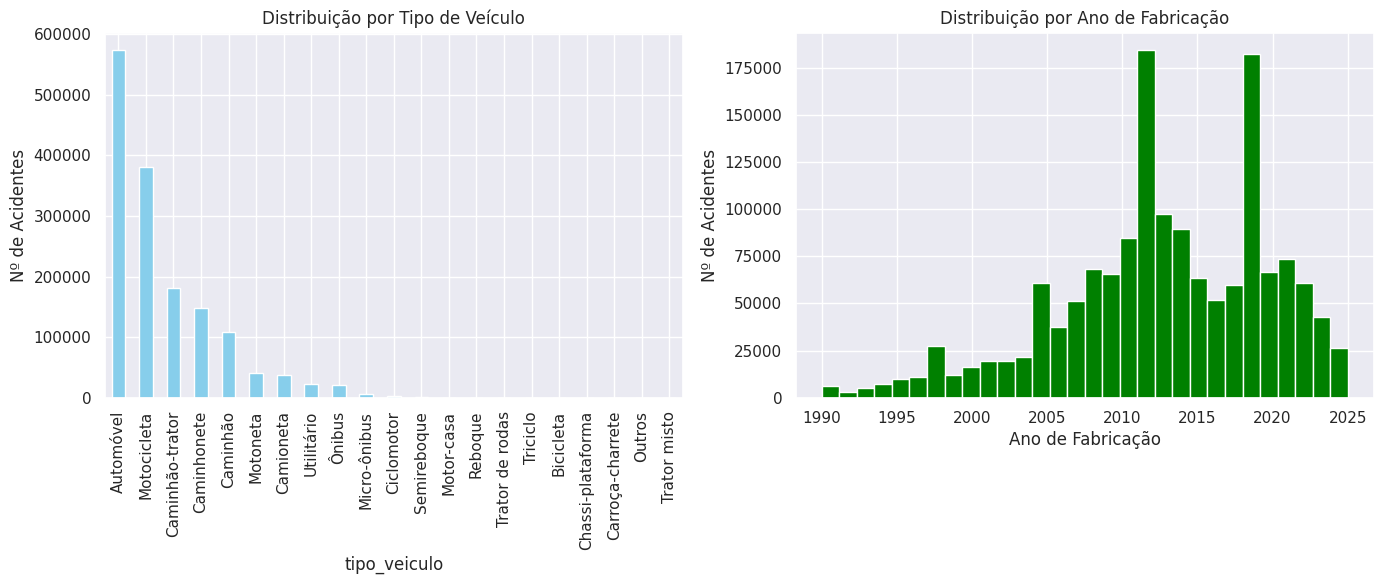

In [ ]:

if {'tipo_veiculo', 'ano_fabricacao_veiculo'}.issubset(df_veiculos.columns):
    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    # Distribuição por tipo de veículo
    df_veiculos['tipo_veiculo'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title("Distribuição por Tipo de Veículo")
    axes[0].set_ylabel("Nº de Acidentes")

    # Distribuição por ano de fabricação
    df_veiculos['ano_fabricacao_veiculo'].dropna().astype(int).hist(ax=axes[1], bins=30, color='green')
    axes[1].set_title("Distribuição por Ano de Fabricação")
    axes[1].set_xlabel("Ano de Fabricação")
    axes[1].set_ylabel("Nº de Acidentes")

    plt.tight_layout()
    plt.show()



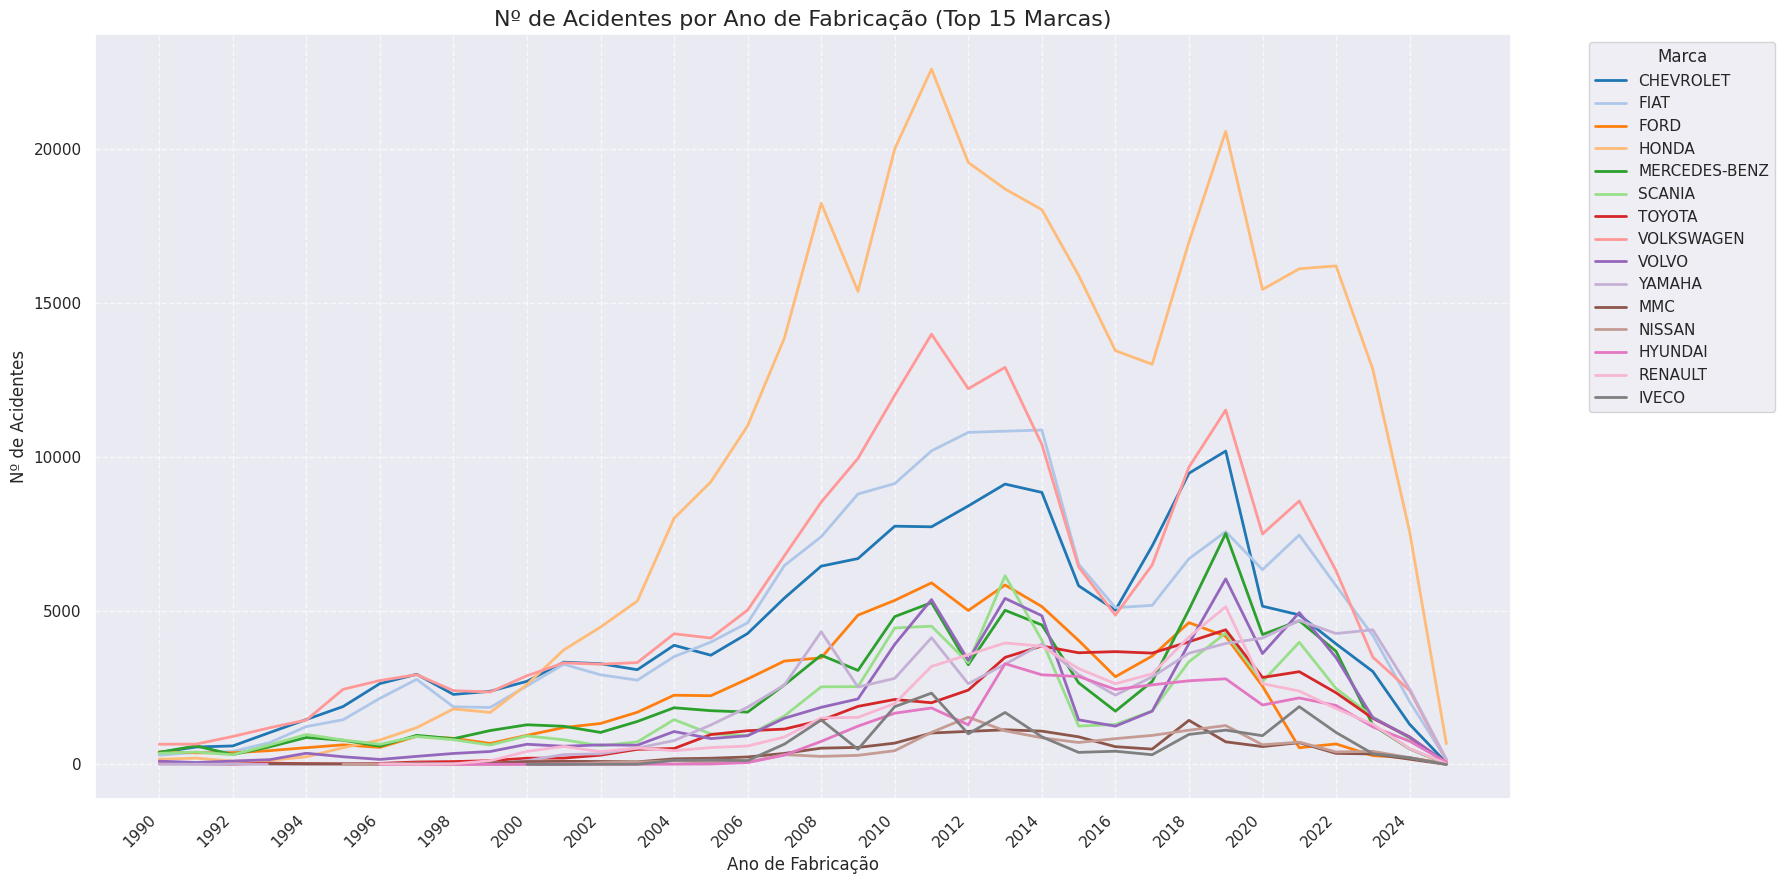

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Pressupondo que df_veiculos já está carregado e limpo como nas suas etapas anteriores

# Renomeando a coluna 'Marca_Principal' para 'marca_veiculo' para consistência, se necessário.
# Se a sua coluna de marca já for 'Marca_Principal', ignore esta linha:
# df_veiculos = df_veiculos.rename(columns={'Marca_Principal': 'marca_veiculo'})

# 1. Identificar as top 15 marcas
top_15_marcas = df_veiculos['Marca_Arvore'].value_counts().nlargest(15).index.tolist()

# 2. Filtrar o DataFrame, limpar e agrupar
df_top_15 = df_veiculos[df_veiculos['Marca_Arvore'].isin(top_15_marcas)].copy()

# Limpeza e conversão de tipo (igual à sua etapa anterior)
df_top_15['ano_fabricacao_veiculo'] = pd.to_numeric(df_top_15['ano_fabricacao_veiculo'], errors='coerce', downcast='integer')
df_top_15.dropna(subset=['ano_fabricacao_veiculo'], inplace=True)
df_top_15['ano_fabricacao_veiculo'] = df_top_15['ano_fabricacao_veiculo'].astype(int)

# Agrupamento: Contar o número de acidentes por Ano de Fabricação e Marca
df_contagem = df_top_15.groupby(['ano_fabricacao_veiculo', 'Marca_Arvore']).size().reset_index(name='Nº de Acidentes')

# 3. Criar o Gráfico de Linhas com Seaborn
plt.figure(figsize=(18, 9))

# Usamos 'hue' para separar as linhas por marca
sns.lineplot(data=df_contagem,
             x='ano_fabricacao_veiculo',
             y='Nº de Acidentes',
             hue='Marca_Arvore',
             palette='tab20',  # Paleta de cores com 20 cores distintas
             linewidth=2)

plt.title('Nº de Acidentes por Ano de Fabricação (Top 15 Marcas)', fontsize=16)
plt.xlabel('Ano de Fabricação', fontsize=12)
plt.ylabel('Nº de Acidentes', fontsize=12)

# Ajuste do eixo X para mostrar apenas anos inteiros e com rotação
plt.xticks(rotation=45, ha='right', ticks=df_contagem['ano_fabricacao_veiculo'].unique()[::2]) # Mostra a cada 2 anos

# Ajuste da legenda fora da área de plotagem para não poluir o gráfico
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

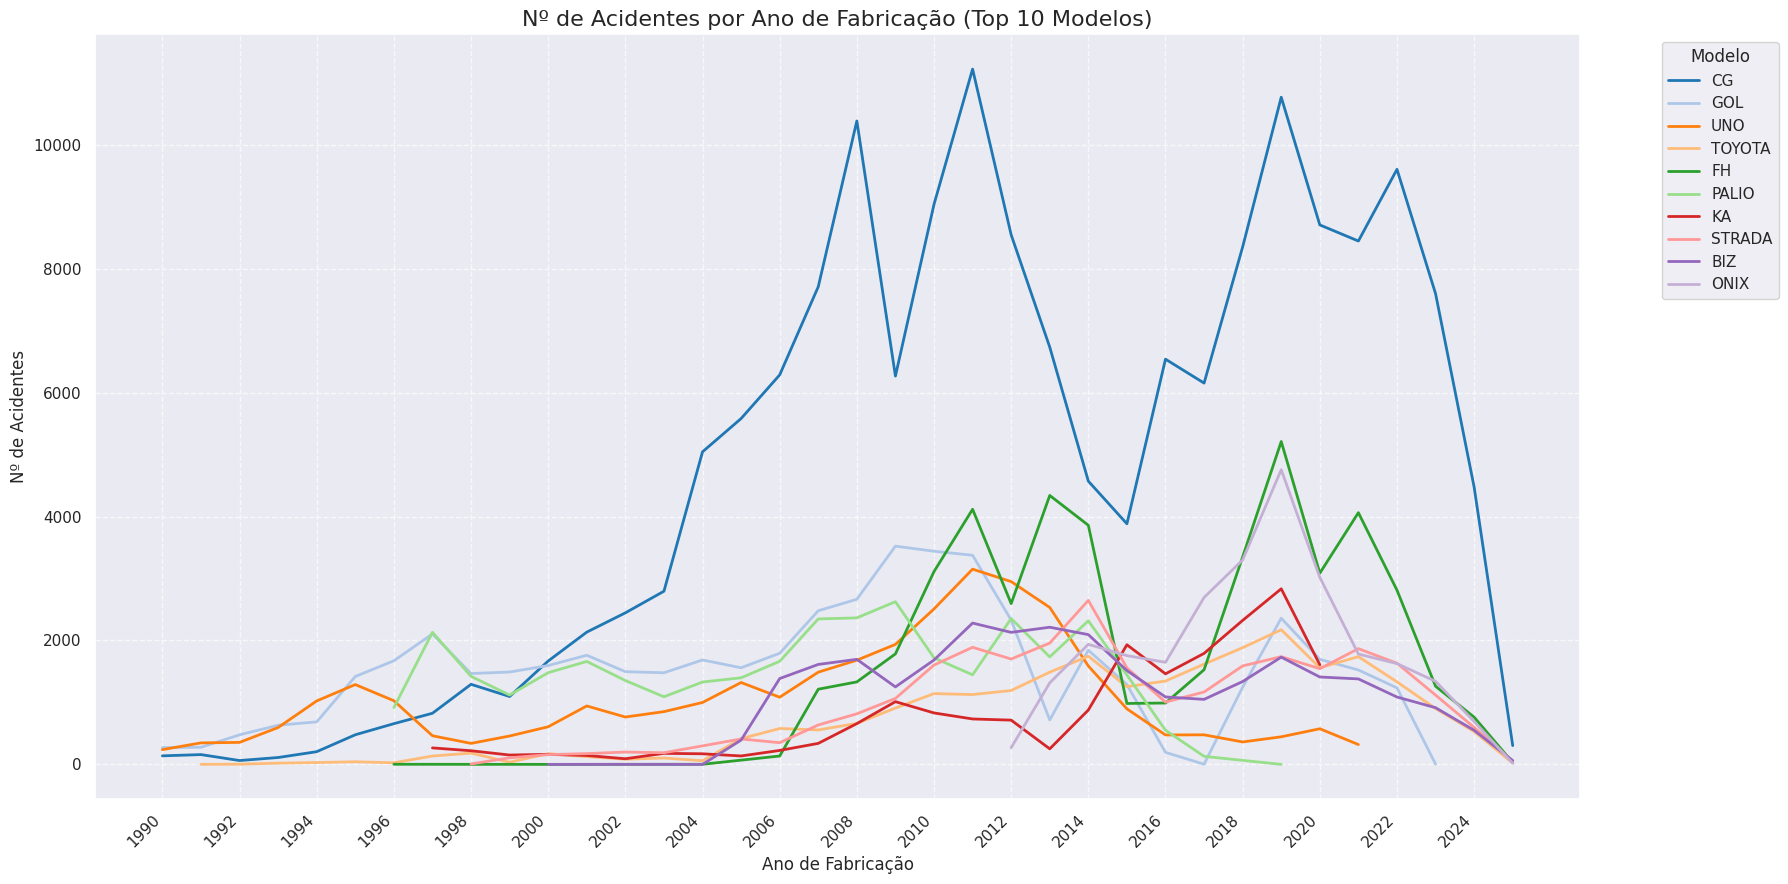

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Pressupondo que df_veiculos já está carregado e limpo como nas suas etapas anteriores

# Renomeando a coluna 'Marca_Principal' para 'marca_veiculo' para consistência, se necessário.
# Se a sua coluna de marca já for 'Marca_Principal', ignore esta linha:
# df_veiculos = df_veiculos.rename(columns={'Marca_Principal': 'marca_veiculo'})

# 1. Identificar as top 15 marcas
top_10_marcas = df_veiculos['Marca_Subarvore'].value_counts().nlargest(10).index.tolist()

# 2. Filtrar o DataFrame, limpar e agrupar
df_top_10 = df_veiculos[df_veiculos['Marca_Subarvore'].isin(top_10_marcas)].copy()

# Limpeza e conversão de tipo (igual à sua etapa anterior)
df_top_10['ano_fabricacao_veiculo'] = pd.to_numeric(df_top_10['ano_fabricacao_veiculo'], errors='coerce', downcast='integer')
df_top_10.dropna(subset=['ano_fabricacao_veiculo'], inplace=True)
df_top_10['ano_fabricacao_veiculo'] = df_top_10['ano_fabricacao_veiculo'].astype(int)

# Agrupamento: Contar o número de acidentes por Ano de Fabricação e Marca
df_contagem = df_top_10.groupby(['ano_fabricacao_veiculo', 'Marca_Subarvore']).size().reset_index(name='Nº de Acidentes')

# 3. Criar o Gráfico de Linhas com Seaborn
plt.figure(figsize=(18, 9))

# Usamos 'hue' para separar as linhas por marca
sns.lineplot(data=df_contagem,
             x='ano_fabricacao_veiculo',
             y='Nº de Acidentes',
             hue='Marca_Subarvore',
             palette='tab20',  # Paleta de cores com 20 cores distintas
             linewidth=2)

plt.title('Nº de Acidentes por Ano de Fabricação (Top 10 Modelos)', fontsize=16)
plt.xlabel('Ano de Fabricação', fontsize=12)
plt.ylabel('Nº de Acidentes', fontsize=12)

# Ajuste do eixo X para mostrar apenas anos inteiros e com rotação
plt.xticks(rotation=45, ha='right', ticks=df_contagem['ano_fabricacao_veiculo'].unique()[::2]) # Mostra a cada 2 anos

# Ajuste da legenda fora da área de plotagem para não poluir o gráfico
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

plt.grid(axis='both', linestyle='--', alpha=0.7)    
plt.tight_layout()
plt.show()

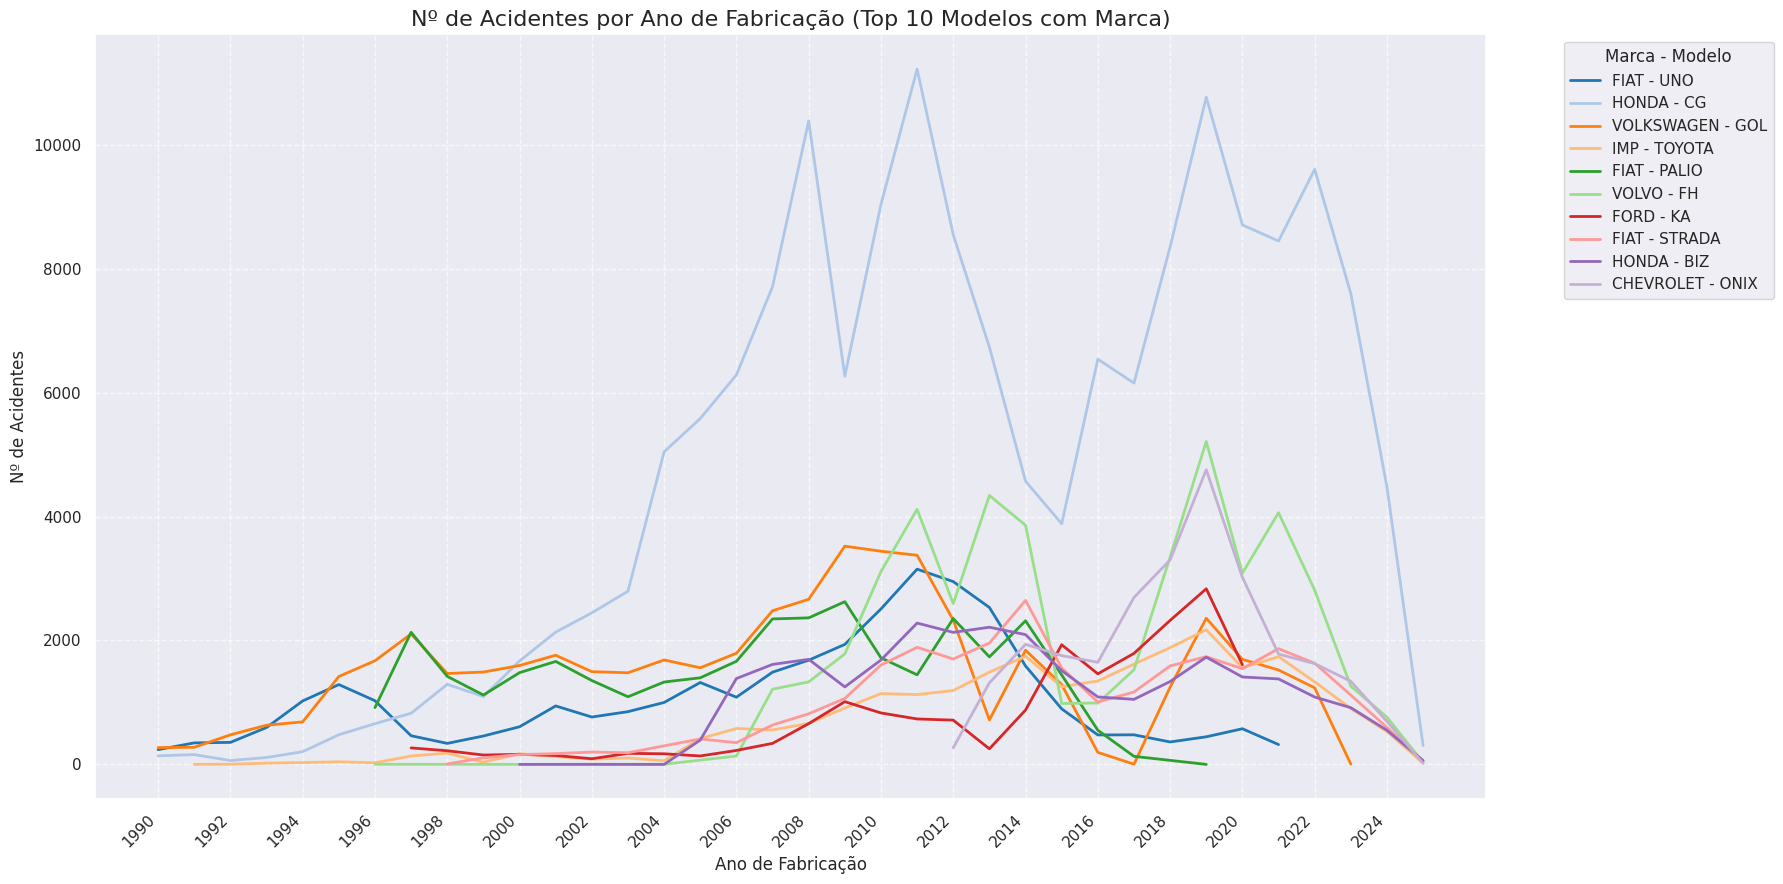

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Pressupondo que df_veiculos já está carregado e contém 'Nome_Modelo', 'Marca_Principal' e 'ano_fabricacao_veiculo'

# 1. Identificar os top 10 modelos
top_10_modelos = df_veiculos['Marca_Subarvore'].value_counts().nlargest(10).index.tolist()

# 2. Filtrar o DataFrame, limpar e agrupar
df_top_10 = df_veiculos[df_veiculos['Marca_Subarvore'].isin(top_10_modelos)].copy()

# Limpeza e conversão de tipo (igual à sua etapa anterior)
df_top_10['ano_fabricacao_veiculo'] = pd.to_numeric(df_top_10['ano_fabricacao_veiculo'], errors='coerce', downcast='integer')
df_top_10.dropna(subset=['ano_fabricacao_veiculo'], inplace=True)
df_top_10['ano_fabricacao_veiculo'] = df_top_10['ano_fabricacao_veiculo'].astype(int)

# 3. Criar uma coluna de rótulo combinada (Marca - Modelo)
# Primeiro, agrupamos para pegar a marca principal de cada modelo no nosso subset
# Usamos .first() assumindo que Nome_Modelo tem uma única Marca_Principal no subset
# Se houver mais de uma marca para um modelo, isso pegará a primeira que aparecer.
marca_modelo_map = df_top_10.groupby('Marca_Subarvore')['Marca_Arvore'].first().to_dict()

# Mapear a marca de volta para o DataFrame e criar o novo rótulo
df_top_10['Marca_Modelo_Label'] = df_top_10.apply(
    lambda row: f"{marca_modelo_map[row['Marca_Subarvore']]} - {row['Marca_Subarvore']}", axis=1
)

# 4. Agrupamento: Contar o número de acidentes por Ano de Fabricação e pelo novo Rótulo
df_contagem = df_top_10.groupby(['ano_fabricacao_veiculo', 'Marca_Modelo_Label']).size().reset_index(name='Nº de Acidentes')

# 5. Criar o Gráfico de Linhas com Seaborn
plt.figure(figsize=(18, 9))

# Usamos 'hue' para separar as linhas pelo novo rótulo combinado
sns.lineplot(data=df_contagem,
             x='ano_fabricacao_veiculo',
             y='Nº de Acidentes',
             hue='Marca_Modelo_Label',
             palette='tab20',  # Paleta de cores com 20 cores distintas
             linewidth=2)

plt.title('Nº de Acidentes por Ano de Fabricação (Top 10 Modelos com Marca)', fontsize=16)
plt.xlabel('Ano de Fabricação', fontsize=12)
plt.ylabel('Nº de Acidentes', fontsize=12)

# Ajuste do eixo X para mostrar apenas anos inteiros e com rotação
# Garante que os anos no eixo X sejam os únicos e a cada 2 anos, como antes
anos_unicos = df_contagem['ano_fabricacao_veiculo'].unique()
plt.xticks(rotation=45, ha='right', ticks=anos_unicos[::2])

# Ajuste da legenda fora da área de plotagem para não poluir o gráfico
plt.legend(title='Marca - Modelo', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

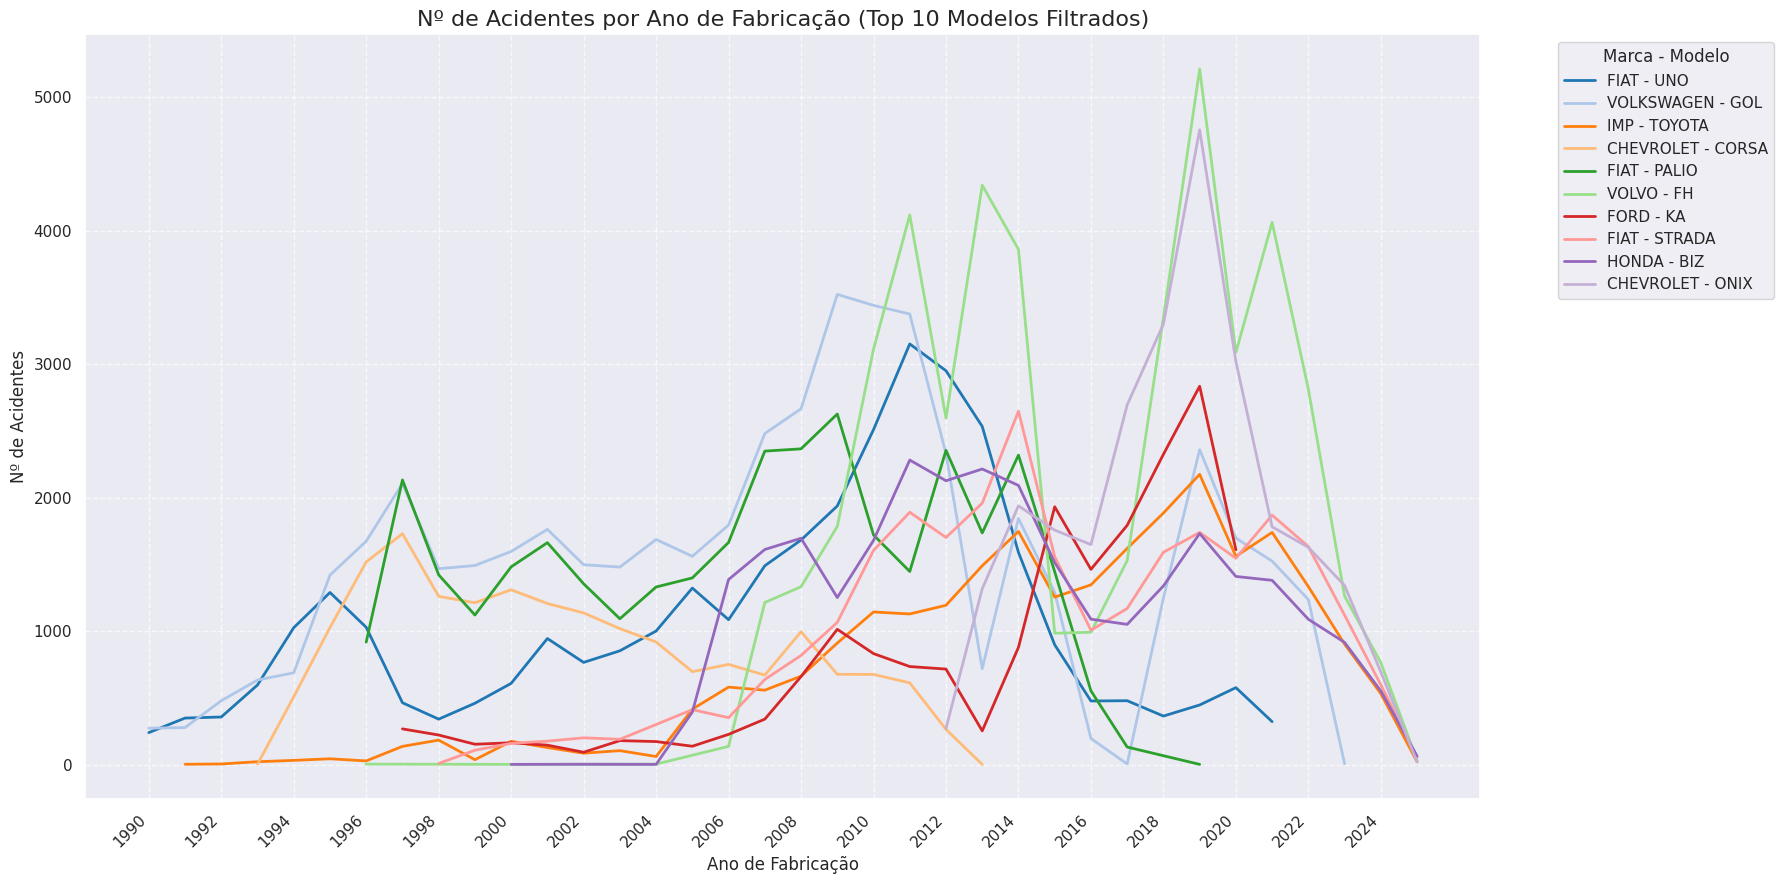

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Pressupondo que df_veiculos já está carregado e contém 'Nome_Modelo', 'Marca_Principal' e 'ano_fabricacao_veiculo'

# --- APLICANDO OS FILTROS AQUI ---
valor_excluir_subarvore = 'NO'
tipo_excluir = 'Motocicleta'

# 1. Filtro 1: Excluir 'NO' da Marca_Subarvore
df_filtrado = df_veiculos[~df_veiculos['Marca_Subarvore'].eq(valor_excluir_subarvore)].copy() 

# 2. Filtro 2: Excluir 'Motocicleta' do tipo_veiculo
df_filtrado = df_filtrado[~df_filtrado['tipo_veiculo'].eq(tipo_excluir)].copy()
# -----------------------------------


# 1. Identificar os top 10 modelos (agora do DataFrame FILTRADO)
top_10_modelos = df_filtrado['Marca_Subarvore'].value_counts().nlargest(10).index.tolist()

# 2. Filtrar o DataFrame
# Usamos o df_filtrado, mas re-filtramos apenas para os top 10 modelos
df_top_10 = df_filtrado[df_filtrado['Marca_Subarvore'].isin(top_10_modelos)].copy()

# Limpeza e conversão de tipo (mantido do seu código original)
df_top_10['ano_fabricacao_veiculo'] = pd.to_numeric(df_top_10['ano_fabricacao_veiculo'], errors='coerce', downcast='integer')
df_top_10.dropna(subset=['ano_fabricacao_veiculo'], inplace=True)
df_top_10['ano_fabricacao_veiculo'] = df_top_10['ano_fabricacao_veiculo'].astype(int)

# 3. Criar uma coluna de rótulo combinada (Marca - Modelo)
# Primeiro, agrupamos para pegar a marca principal de cada modelo no nosso subset
marca_modelo_map = df_top_10.groupby('Marca_Subarvore')['Marca_Arvore'].first().to_dict()

# Mapear a marca de volta para o DataFrame e criar o novo rótulo
df_top_10['Marca_Modelo_Label'] = df_top_10.apply(
    lambda row: f"{marca_modelo_map[row['Marca_Subarvore']]} - {row['Marca_Subarvore']}", axis=1
)

# 4. Agrupamento: Contar o número de acidentes por Ano de Fabricação e pelo novo Rótulo
df_contagem = df_top_10.groupby(['ano_fabricacao_veiculo', 'Marca_Modelo_Label']).size().reset_index(name='Nº de Acidentes')

# 5. Criar o Gráfico de Linhas com Seaborn
plt.figure(figsize=(18, 9))

# Usamos 'hue' para separar as linhas pelo novo rótulo combinado
sns.lineplot(data=df_contagem,
             x='ano_fabricacao_veiculo',
             y='Nº de Acidentes',
             hue='Marca_Modelo_Label',
             palette='tab20',  # Paleta de cores com 20 cores distintas
             linewidth=2)

plt.title('Nº de Acidentes por Ano de Fabricação (Top 10 Modelos Filtrados)', fontsize=16)
plt.xlabel('Ano de Fabricação', fontsize=12)
plt.ylabel('Nº de Acidentes', fontsize=12)

# Ajuste do eixo X para mostrar apenas anos inteiros e com rotação
anos_unicos = df_contagem['ano_fabricacao_veiculo'].unique()
# Adiciona uma verificação para garantir que anos_unicos não esteja vazio
if len(anos_unicos) > 0:
    plt.xticks(rotation=45, ha='right', ticks=anos_unicos[::2])
else:
    # Se não houver anos após a filtragem, remove os ticks
    plt.xticks([])


# Ajuste da legenda fora da área de plotagem para não poluir o gráfico
plt.legend(title='Marca - Modelo', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# --- Defina aqui as colunas que você quer analisar ---
colunas = ['marca', 'Marca_Principal', 'Nome_Modelo', 'Marca_Arvore', 'Marca_Subarvore']

# --- Gera um dicionário com DataFrames contendo os valores únicos ---
sheets = {}
for c in colunas:
    unicos = df[c].dropna().unique()
    unicos = sorted(unicos.tolist())
    sheets[c] = pd.DataFrame({c: unicos})

# --- Caminho do arquivo de saída ---
caminho_excel = "listas_unicas_veiculos.xlsx"

# --- Grava cada lista em uma aba do Excel ---
with pd.ExcelWriter(caminho_excel, engine='openpyxl') as writer:
    for nome_aba, tabela in sheets.items():
        tabela.to_excel(writer, sheet_name=nome_aba, index=False)

print(f"Arquivo gerado: {caminho_excel}")


Arquivo gerado: listas_unicas_veiculos.xlsx


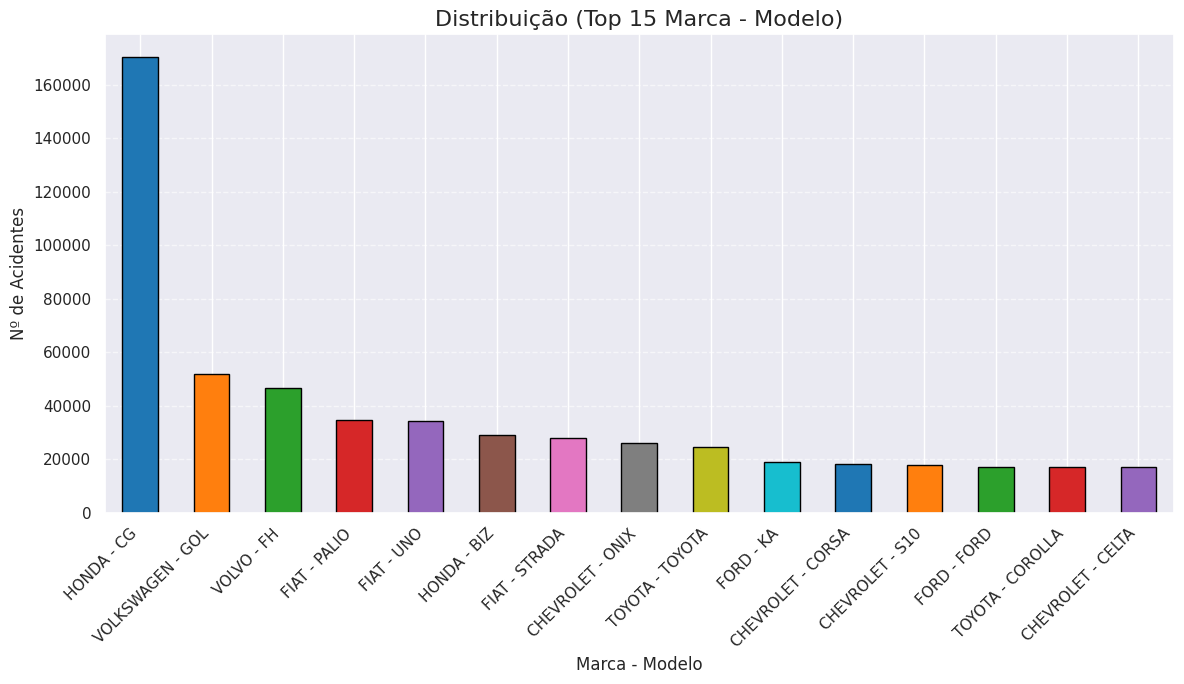

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Remover linhas com CG150
df_veiculos = df_veiculos[~df_veiculos['Marca_Subarvore'].str.contains("CG150", case=False, na=False)]

# --- Pré-processamento e Criação do Rótulo Combinado ---

top_15_modelos = df_veiculos['Marca_Subarvore'].value_counts().nlargest(15).index.tolist()
df_top_15 = df_veiculos[df_veiculos['Marca_Subarvore'].isin(top_15_modelos)].copy()

df_top_15['Marca_Modelo_Label'] = df_top_15.apply(
    lambda row: f"{row['Marca_Arvore']} - {row['Marca_Subarvore']}", axis=1
)

contagem_marca_modelo = df_top_15['Marca_Modelo_Label'].value_counts().nlargest(15)

# --- Geração do Gráfico Único ---
if {'Marca_Subarvore', 'Marca_Arvore'}.issubset(df_veiculos.columns):
    fig, ax = plt.subplots(1, 1, figsize=(12, 7))

    contagem_marca_modelo.plot(
        kind='bar',
        ax=ax,
        color=sns.color_palette("tab10", 15),
        edgecolor='black'
    )
    ax.set_title("Distribuição (Top 15 Marca - Modelo)", fontsize=16)
    ax.set_ylabel("Nº de Acidentes", fontsize=12)
    ax.set_xlabel("Marca - Modelo", fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("O DataFrame 'df_veiculos' precisa das colunas 'Marca_Subarvore' e 'Marca_Arvore'.")


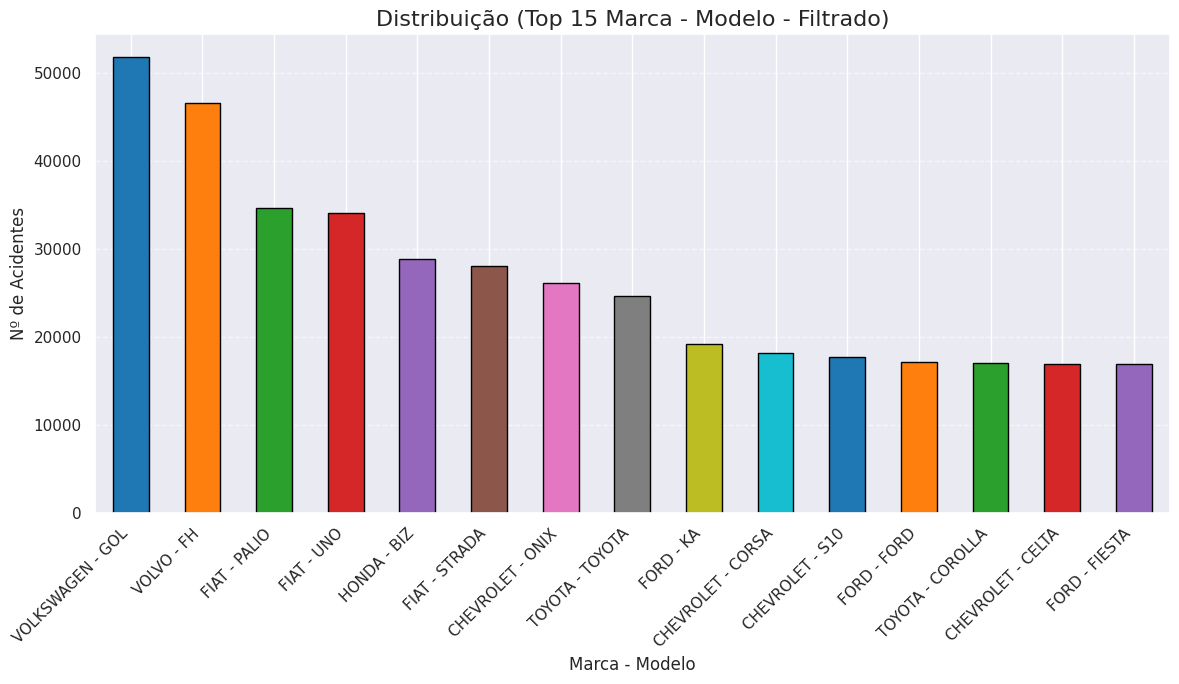

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Presumimos que df_veiculos já está carregado e contém 'Marca_Subarvore', 'Marca_Arvore' e 'tipo_veiculo'

# --- APLICANDO OS FILTROS AQUI ---
valor_excluir_subarvore = 'NO'
tipo_excluir = 'Motocicleta'

# 1. Filtro 1: Excluir 'NO' da Marca_Subarvore
df_filtrado = df_veiculos[~df_veiculos['Marca_Subarvore'].eq(valor_excluir_subarvore)].copy() 

# 2. Filtro 2: Excluir 'Motocicleta' do tipo_veiculo
df_filtrado = df_filtrado[~df_filtrado['tipo_veiculo'].eq(tipo_excluir)].copy()
# -----------------------------------


# --- Pré-processamento e Criação do Rótulo Combinado (Usando df_filtrado) ---

# 1. Identificar os top 15 modelos (agora do DataFrame FILTRADO)
top_15_modelos = df_filtrado['Marca_Subarvore'].value_counts().nlargest(15).index.tolist()

# 2. Filtrar o DataFrame
# Usamos o df_filtrado, mas re-filtramos apenas para os top 15 modelos
df_top_15 = df_filtrado[df_filtrado['Marca_Subarvore'].isin(top_15_modelos)].copy()

# 3. Criar a coluna de rótulo combinado "Marca - Modelo"
# Cria o rótulo combinado para todos os modelos no subconjunto
df_top_15['Marca_Modelo_Label'] = df_top_15.apply(
    lambda row: f"{row['Marca_Arvore']} - {row['Marca_Subarvore']}", axis=1
)

# 4. Contar a frequência total dos novos rótulos
contagem_marca_modelo = df_top_15['Marca_Modelo_Label'].value_counts().nlargest(15)


# --- Geração do Gráfico Único ---

if {'Marca_Subarvore', 'Marca_Arvore'}.issubset(df_veiculos.columns):
    
    if contagem_marca_modelo.empty:
        print("AVISO: Após a filtragem, não há dados suficientes para plotar os Top 15 modelos.")
    else:
        # Cria uma figura com apenas 1 subgráfico (1 linha, 1 coluna)
        fig, ax = plt.subplots(1, 1, figsize=(12, 7)) # Ajuste o tamanho para caber em uma única plotagem
        
        # Gráfico Único: Distribuição por Marca - Modelo (Top 15)
        contagem_marca_modelo.plot(
            kind='bar',
            ax=ax,  
            color=sns.color_palette("tab10", 15),
            edgecolor='black'
        )
        ax.set_title("Distribuição (Top 15 Marca - Modelo - Filtrado)", fontsize=16)
        ax.set_ylabel("Nº de Acidentes", fontsize=12)
        ax.set_xlabel("Marca - Modelo", fontsize=12)

        # Aplica a rotação e alinhamento horizontal (CORREÇÃO DO ERRO ANTERIOR)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        ax.grid(axis='y', linestyle='--', alpha=0.6)

        plt.tight_layout() # Ajusta automaticamente o espaçamento
        plt.show()

else:
    print("O DataFrame 'df_veiculos' precisa das colunas 'Marca_Subarvore' e 'Marca_Arvore'.")

In [ ]:
!pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


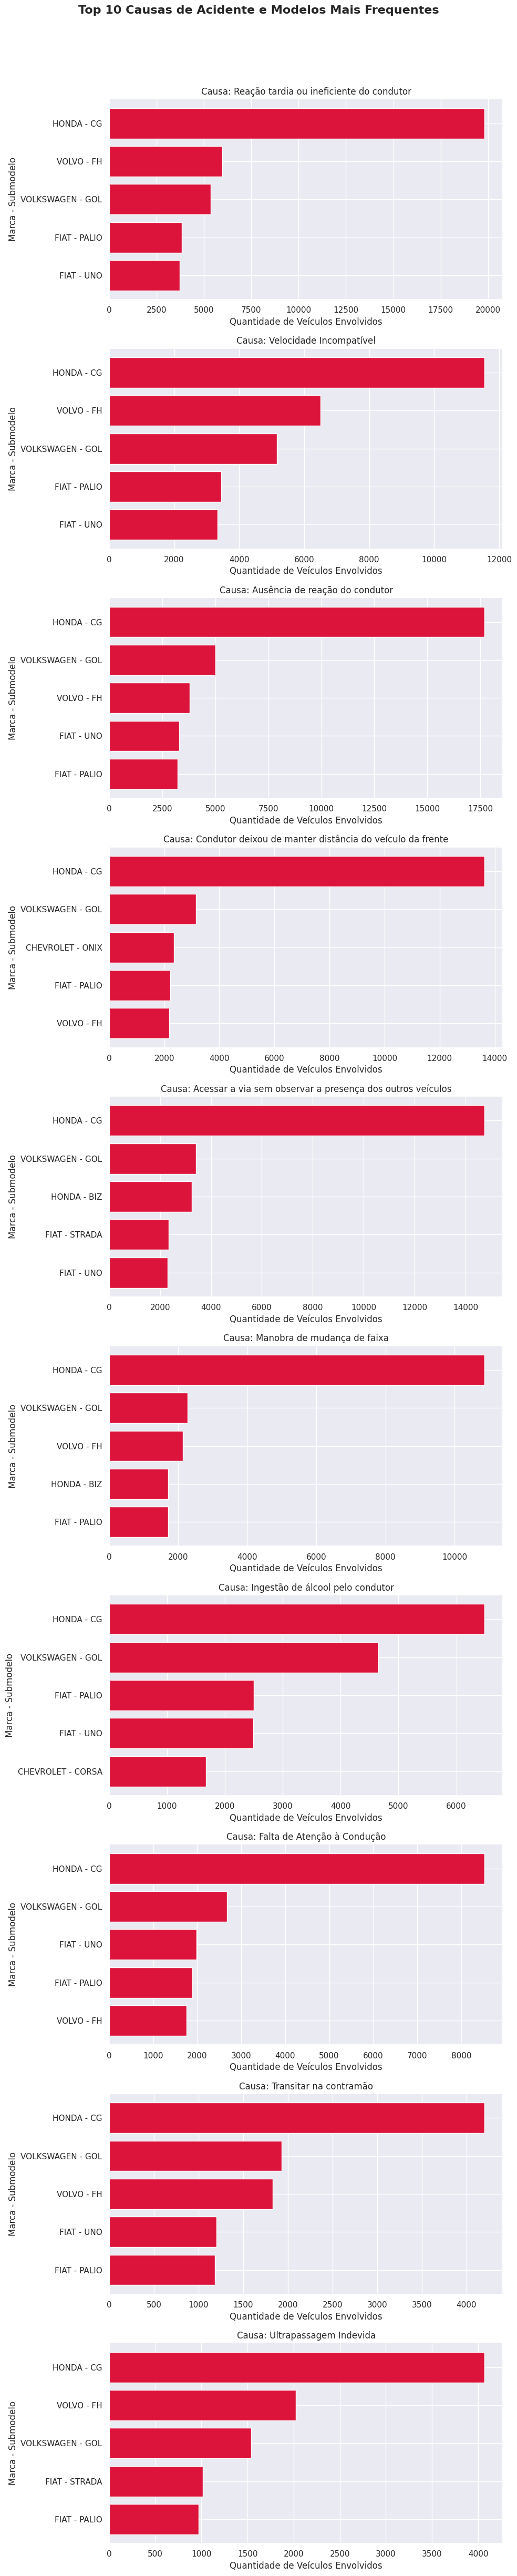

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Importar pandas se ainda não o fez

# --- 1. FILTRO: Remover 'Não informado' da Marca_Principal ---

# O valor a ser excluído
valor_excluir = 'NO'

# Cria o novo DataFrame 'df_filtrado' removendo as linhas onde 'Marca_Principal' é igual ao valor_excluir
# Usamos o operador de negação (~)
df_filtrado = df[~df['Marca_Subarvore'].eq(valor_excluir)].copy()


# --- 2. PREPARAÇÃO DO RÓTULO COMBINADO (Marca_Arvore - Marca_Subarvore) ---

# Criar um dicionário de mapeamento: Marca_Subarvore -> Marca_Arvore
# Isso garante que teremos o nome da Marca_Arvore correto para cada Marca_Subarvore
# Assumimos que a combinação Marca_Subarvore -> Marca_Arvore é 1 para 1
marca_map = df_filtrado.set_index('Marca_Subarvore')['Marca_Arvore'].to_dict()

# Top 10 causas de acidente (usando o df_filtrado)
top_causas = (
    df_filtrado.groupby('causa_acidente')
    .size()
    .reset_index(name='qtd_acidentes')
    .sort_values('qtd_acidentes', ascending=False)
    .head(10)
)

n_causas = len(top_causas)

# Adicionar verificação de segurança
if n_causas == 0:
    print("O DataFrame filtrado não contém dados suficientes para gerar o gráfico.")
else:
    fig, axes = plt.subplots(n_causas, 1, figsize=(10, 5*n_causas), sharex=False)
    fig.suptitle("Top 10 Causas de Acidente e Modelos Mais Frequentes", fontsize=16, fontweight='bold')

    # Garantir que axes seja lista mesmo com 1 subplot
    if n_causas == 1:
        axes = [axes]

    for ax, causa in zip(axes, top_causas['causa_acidente']):
        
        # Filtra o subconjunto para a causa atual
        df_causa = df_filtrado[df_filtrado['causa_acidente'] == causa]

        # Contagem: Agrupa e conta pela Marca_Subarvore
        top_modelos = (
            df_causa.groupby('Marca_Subarvore')['ano_fabricacao_veiculo']
            .count()
            .reset_index(name='qtd_veiculos')
            .sort_values('qtd_veiculos', ascending=False)
            .head(5)  # Top 5 modelos/marcas por causa
        )

        # CRIAÇÃO DO RÓTULO COMBINADO A PARTIR DO top_modelos:
        # Pega a Marca_Subarvore e usa o dicionário 'marca_map' para obter a Marca_Arvore
        top_modelos['Marca_Modelo_Label'] = top_modelos['Marca_Subarvore'].apply(
            lambda subarvore: f"{marca_map.get(subarvore, 'Marca Desconhecida')} - {subarvore}"
        )
        
        # O gráfico agora usa o rótulo combinado para o eixo Y
        ax.barh(top_modelos['Marca_Modelo_Label'], top_modelos['qtd_veiculos'], color='crimson')
        
        ax.set_title(f"Causa: {causa}")
        ax.set_xlabel("Quantidade de Veículos Envolvidos")
        # Rótulo do eixo Y atualizado para refletir o rótulo combinado
        ax.set_ylabel("Marca - Submodelo") 
        ax.invert_yaxis() # maior no topo

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

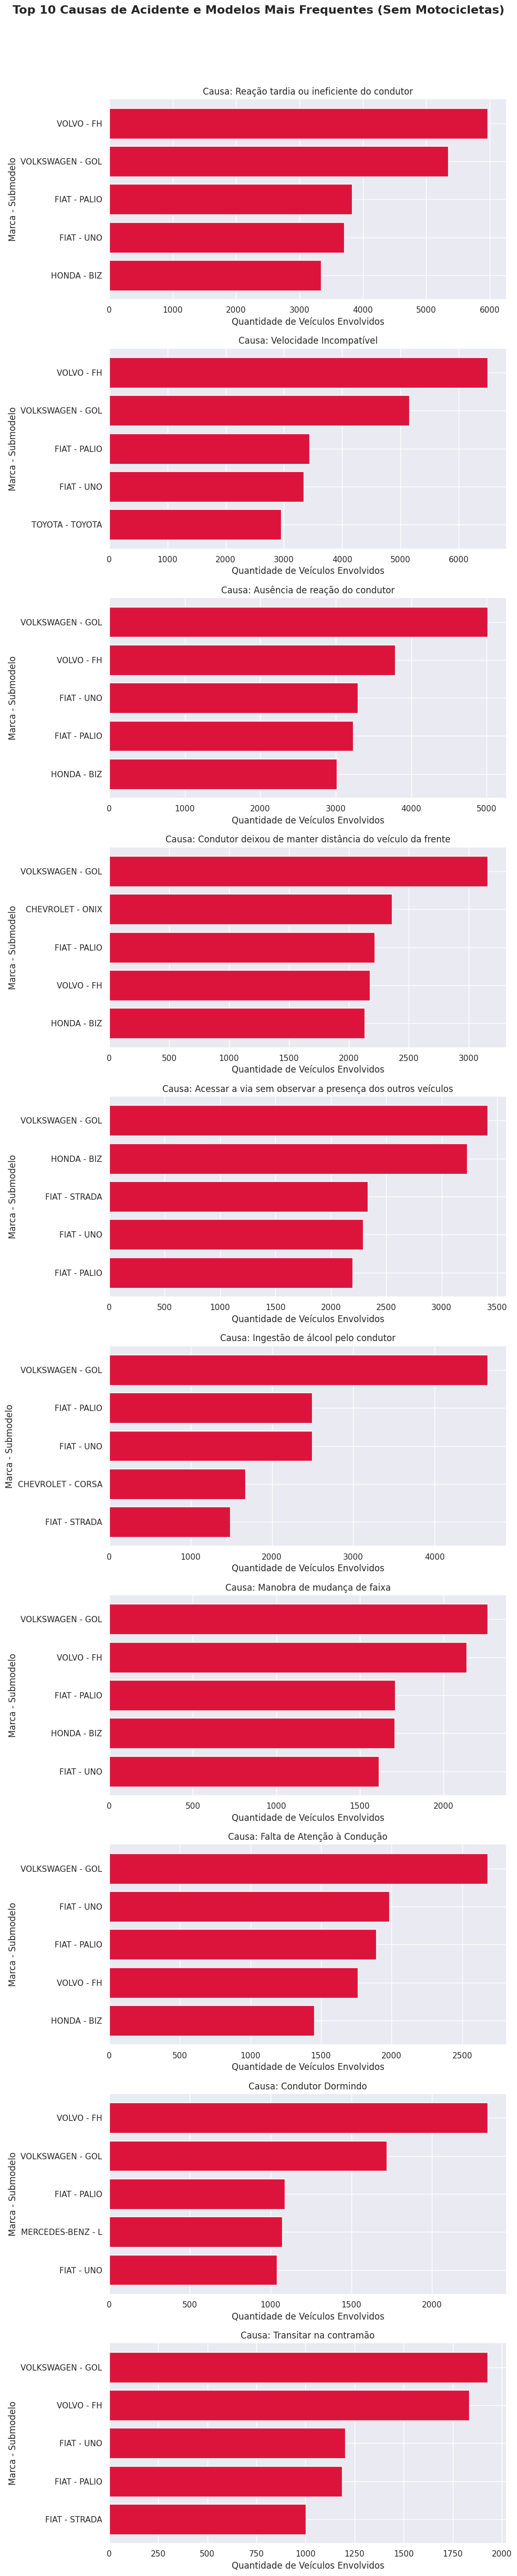

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 

# --- 1. FILTRO: Remover 'NO' da Marca_Subarvore ---

valor_excluir_subarvore = 'NO'
tipo_excluir = 'Motocicleta' # Novo valor a ser excluído

# Filtra 1: Remove 'NO' da Marca_Subarvore
df_filtrado_no = df[~df['Marca_Subarvore'].eq(valor_excluir_subarvore)].copy()

# Filtra 2: Remove 'Motocicleta' do tipo_veiculo
df_filtrado = df_filtrado_no[~df_filtrado_no['tipo_veiculo'].eq(tipo_excluir)].copy()


# --- 2. PREPARAÇÃO DO RÓTULO COMBINADO (Marca_Arvore - Marca_Subarvore) ---

# Criar um dicionário de mapeamento: Marca_Subarvore -> Marca_Arvore
try:
    # Usa o df_filtrado (que exclui 'NO' e 'Motocicleta')
    marca_map = df_filtrado[['Marca_Subarvore', 'Marca_Arvore']].drop_duplicates().set_index('Marca_Subarvore')['Marca_Arvore'].to_dict()
except KeyError:
    print("Erro: O DataFrame não possui as colunas 'Marca_Subarvore' e/ou 'Marca_Arvore'. Não será possível gerar o rótulo combinado.")
    marca_map = {}

# Top 10 causas de acidente (usando o df_filtrado)
top_causas = (
    df_filtrado.groupby('causa_acidente')
    .size()
    .reset_index(name='qtd_acidentes')
    .sort_values('qtd_acidentes', ascending=False)
    .head(10)
)

n_causas = len(top_causas)

# Adicionar verificação de segurança
if n_causas == 0:
    print("O DataFrame filtrado (sem 'NO' e sem 'Motocicleta') não contém dados suficientes para gerar o gráfico.")
else:
    fig, axes = plt.subplots(n_causas, 1, figsize=(10, 5*n_causas), sharex=False)
    fig.suptitle("Top 10 Causas de Acidente e Modelos Mais Frequentes (Sem Motocicletas)", fontsize=16, fontweight='bold')

    # Garantir que axes seja lista mesmo com 1 subplot
    if n_causas == 1:
        axes = [axes]

    for ax, causa in zip(axes, top_causas['causa_acidente']):
        
        # Filtra o subconjunto para a causa atual
        df_causa = df_filtrado[df_filtrado['causa_acidente'] == causa]

        # Contagem: Agrupa e conta pela Marca_Subarvore
        top_modelos = (
            df_causa.groupby('Marca_Subarvore')['ano_fabricacao_veiculo']
            .count()
            .reset_index(name='qtd_veiculos')
            .sort_values('qtd_veiculos', ascending=False)
            .head(5)  # Top 5 modelos/marcas por causa
        )

        # CRIAÇÃO DO RÓTULO COMBINADO A PARTIR DO top_modelos:
        top_modelos['Marca_Modelo_Label'] = top_modelos['Marca_Subarvore'].apply(
            lambda subarvore: f"{marca_map.get(subarvore, 'Marca Desconhecida')} - {subarvore}"
        )
        
        # O gráfico agora usa o rótulo combinado para o eixo Y
        ax.barh(top_modelos['Marca_Modelo_Label'], top_modelos['qtd_veiculos'], color='crimson')
        
        ax.set_title(f"Causa: {causa}")
        ax.set_xlabel("Quantidade de Veículos Envolvidos")
        # Rótulo do eixo Y atualizado para refletir o rótulo combinado
        ax.set_ylabel("Marca - Submodelo") 
        ax.invert_yaxis() # maior no topo

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

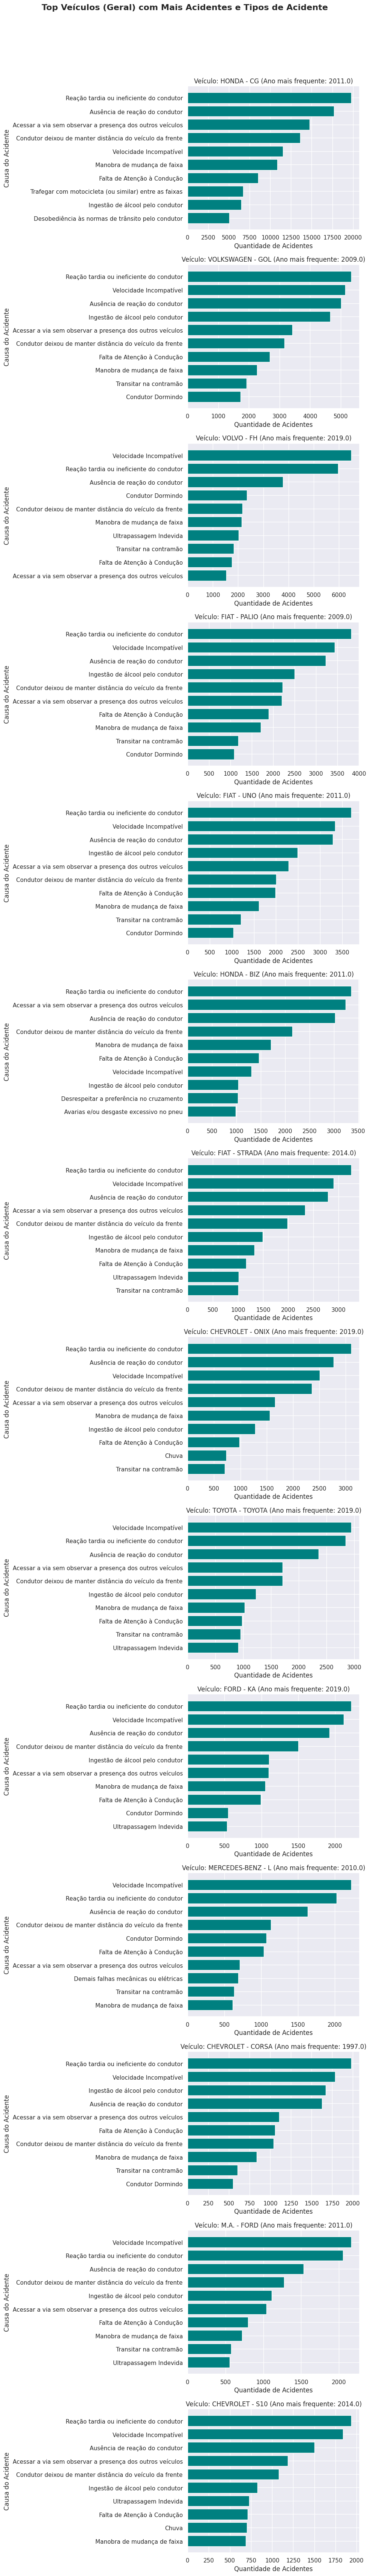

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir o valor inválido a ser filtrado (do submodelo)
valor_excluir_exato = 'NO'              # Match exato
substring_excluir = 'CG150'             # Match por substring

# Criar df_limpo aplicando dois filtros:
# 1) remover quem é exatamente 'NO'
# 2) remover qualquer linha que contenha "CG150" (case-insensitive)
df_limpo = df[
    (~df['Marca_Subarvore'].eq(valor_excluir_exato)) &
    (~df['Marca_Subarvore'].str.contains(substring_excluir, case=False, na=False))
].copy()

# --- NOVO PASSO: Criar o mapeamento Marca_Subarvore -> Marca_Arvore ---
try:
    # Cria o mapeamento. Usamos .drop_duplicates() para garantir que
    # o índice (Marca_Subarvore) seja único.
    marca_map = df_limpo[['Marca_Subarvore', 'Marca_Arvore']].drop_duplicates().set_index('Marca_Subarvore')['Marca_Arvore'].to_dict()
except KeyError:
    print("Erro: O DataFrame não possui as colunas 'Marca_Subarvore' e/ou 'Marca_Arvore'. Não será possível gerar o rótulo combinado.")
    marca_map = {}


# --- ANÁLISE GERAL: Top 20 veículos e depois pegar do 1º ao 14º ---

# A contagem agora usa TODOS os tipos de veículos (não apenas 'Automóvel')
top_veiculos = (
    df_limpo.groupby('Marca_Subarvore')['causa_acidente']
    .count()
    .reset_index(name='qtd_acidentes')
    .sort_values('qtd_acidentes', ascending=False)
    .head(20)
)
# Selecionar os 14 primeiros (índices 0 a 13)
top_veiculos = top_veiculos.iloc[0:14] 

n_veiculos = len(top_veiculos)

# Verificação de segurança
if n_veiculos == 0:
    print("A filtragem não resultou em veículos válidos para plotar.")
elif n_veiculos > 0:
    fig, axes = plt.subplots(n_veiculos, 1, figsize=(10, 5*n_veiculos), sharex=False)
    # Título ajustado para refletir a análise geral
    fig.suptitle("Top Veículos (Geral) com Mais Acidentes e Tipos de Acidente", fontsize=16, fontweight='bold')

    if n_veiculos == 1:
        axes = [axes]

    for ax, veiculo in zip(axes, top_veiculos['Marca_Subarvore']):
        
        # Filtrar apenas os acidentes do veículo atual (em TODO o df_limpo)
        df_veiculo = df_limpo[df_limpo['Marca_Subarvore'] == veiculo].copy()
        
        # Top 10 tipos de acidentes
        top_causas = (
            df_veiculo.groupby('causa_acidente')
            .size()
            .reset_index(name='qtd_acidentes')
            .sort_values('qtd_acidentes', ascending=False)
            .head(10)
        )
        
        # Encontrar o ano de fabricação mais frequente para este veículo
        if not df_veiculo.empty and 'ano_fabricacao_veiculo' in df_veiculo.columns:
             ano_mais_frequente = df_veiculo['ano_fabricacao_veiculo'].mode().iloc[0]
        else:
             ano_mais_frequente = "N/A"

        # --- AJUSTE: Criar o Rótulo Combinado para o Título ---
        marca_principal = marca_map.get(veiculo, 'Desconhecida')
        titulo_combinado = f"{marca_principal} - {veiculo}"

        # Plot
        ax.barh(top_causas['causa_acidente'], top_causas['qtd_acidentes'], color='teal')
        
        # Usar o rótulo combinado no título
        ax.set_title(f"Veículo: {titulo_combinado} (Ano mais frequente: {ano_mais_frequente})")
        
        ax.set_xlabel("Quantidade de Acidentes")
        ax.set_ylabel("Causa do Acidente")
        ax.invert_yaxis()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

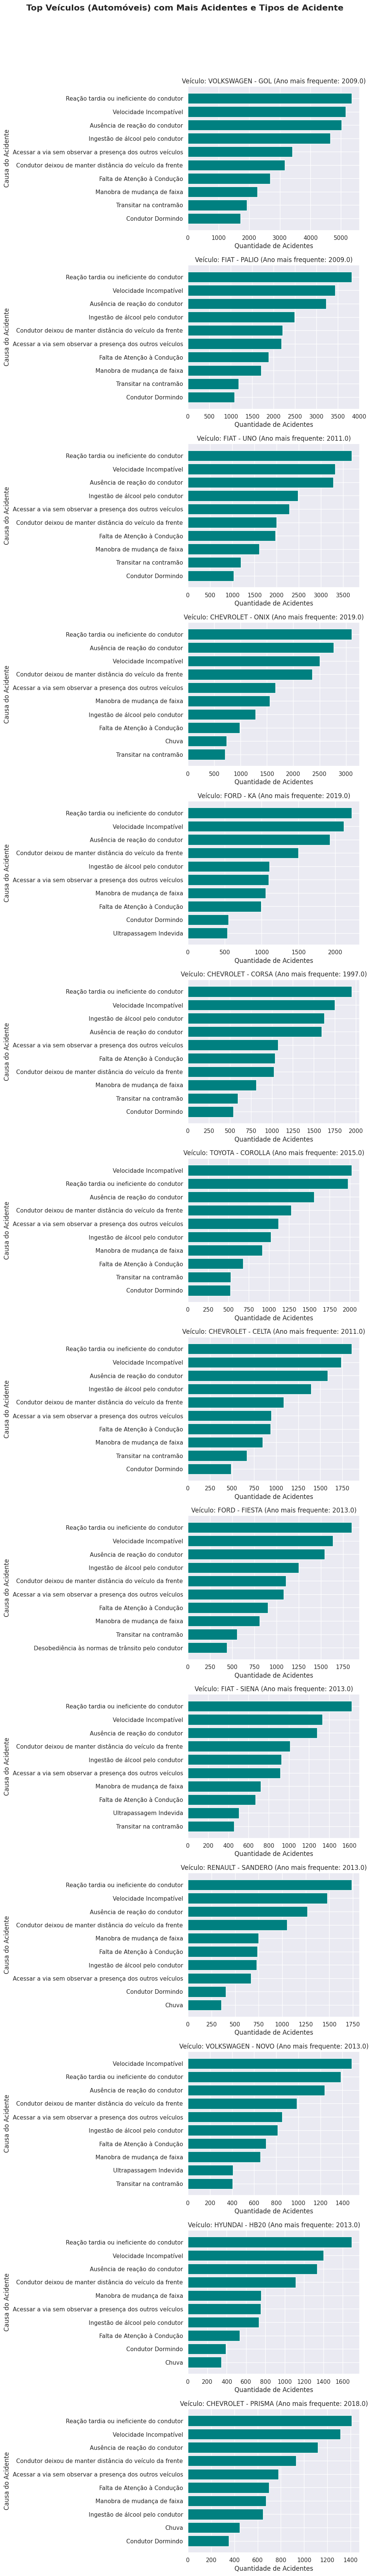

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir os valores inválidos (Mantemos a linha, mas não a usamos,
# assumindo que o DataFrame 'df' já está pronto)
valor_excluir = 'NO'

# Cria o novo DataFrame 'df_filtrado' removendo as linhas onde 'Marca_Principal' é igual ao valor_excluir
# Usamos o operador de negação (~)
df_limpo = df[~df['Marca_Subarvore'].eq(valor_excluir)].copy()

 # Criamos uma cópia limpa para trabalhar

# --- NOVO PASSO: Criar o mapeamento Marca_Subarvore -> Marca_Arvore ---
# Assumimos que Marca_Arvore e Marca_Subarvore existem no df_limpo
try:
    # Cria o mapeamento. Usamos .drop_duplicates() para garantir que
    # o índice (Marca_Subarvore) seja único.
    marca_map = df_limpo[['Marca_Subarvore', 'Marca_Arvore']].drop_duplicates().set_index('Marca_Subarvore')['Marca_Arvore'].to_dict()
except KeyError:
    print("Erro: O DataFrame não possui as colunas 'Marca_Subarvore' e/ou 'Marca_Arvore'. Não será possível gerar o rótulo combinado.")
    # Se a chave não existir, o mapa será vazio e voltaremos ao rótulo simples
    marca_map = {}
# ---------------------------------------------------------------------


# Filtrar apenas veículos do tipo "Automóvel"
df_automoveis = df_limpo[df_limpo['tipo_veiculo'] == 'Automóvel']

# Top 20 veículos e depois pegar do 1º ao 14º
top_veiculos = (
    df_automoveis.groupby('Marca_Subarvore')['causa_acidente']
    .count()
    .reset_index(name='qtd_acidentes')
    .sort_values('qtd_acidentes', ascending=False)
    .head(20)
)
top_veiculos = top_veiculos.iloc[0:14]  # Selecionar os 14 primeiros (índices 0 a 13)

n_veiculos = len(top_veiculos)

# Verificação de segurança
if n_veiculos == 0:
    print("A filtragem não resultou em veículos do tipo 'Automóvel' para plotar.")
elif n_veiculos > 0:
    fig, axes = plt.subplots(n_veiculos, 1, figsize=(10, 5*n_veiculos), sharex=False)
    fig.suptitle("Top Veículos (Automóveis) com Mais Acidentes e Tipos de Acidente", fontsize=16, fontweight='bold')

    if n_veiculos == 1:
        axes = [axes]

    for ax, veiculo in zip(axes, top_veiculos['Marca_Subarvore']):
        # Filtrar apenas os acidentes do veículo atual e do tipo "Automóvel"
        df_veiculo = df_automoveis[df_automoveis['Marca_Subarvore'] == veiculo].copy()
        
        # Top 10 tipos de acidentes
        top_causas = (
            df_veiculo.groupby('causa_acidente')
            .size()
            .reset_index(name='qtd_acidentes')
            .sort_values('qtd_acidentes', ascending=False)
            .head(10)
        )
        
        # Encontrar o ano de fabricação mais frequente para este veículo
        # Adiciona tratamento para colunas vazias, caso o veículo não tenha ano_fabricacao_veiculo
        if not df_veiculo.empty and 'ano_fabricacao_veiculo' in df_veiculo.columns:
             ano_mais_frequente = df_veiculo['ano_fabricacao_veiculo'].mode().iloc[0]
        else:
             ano_mais_frequente = "N/A"

        # --- AJUSTE AQUI: Criar o Rótulo Combinado para o Título ---
        marca_principal = marca_map.get(veiculo, 'Desconhecida')
        titulo_combinado = f"{marca_principal} - {veiculo}"

        # Plot
        ax.barh(top_causas['causa_acidente'], top_causas['qtd_acidentes'], color='teal')
        
        # Usar o rótulo combinado no título
        ax.set_title(f"Veículo: {titulo_combinado} (Ano mais frequente: {ano_mais_frequente})")
        
        ax.set_xlabel("Quantidade de Acidentes")
        ax.set_ylabel("Causa do Acidente")
        ax.invert_yaxis()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

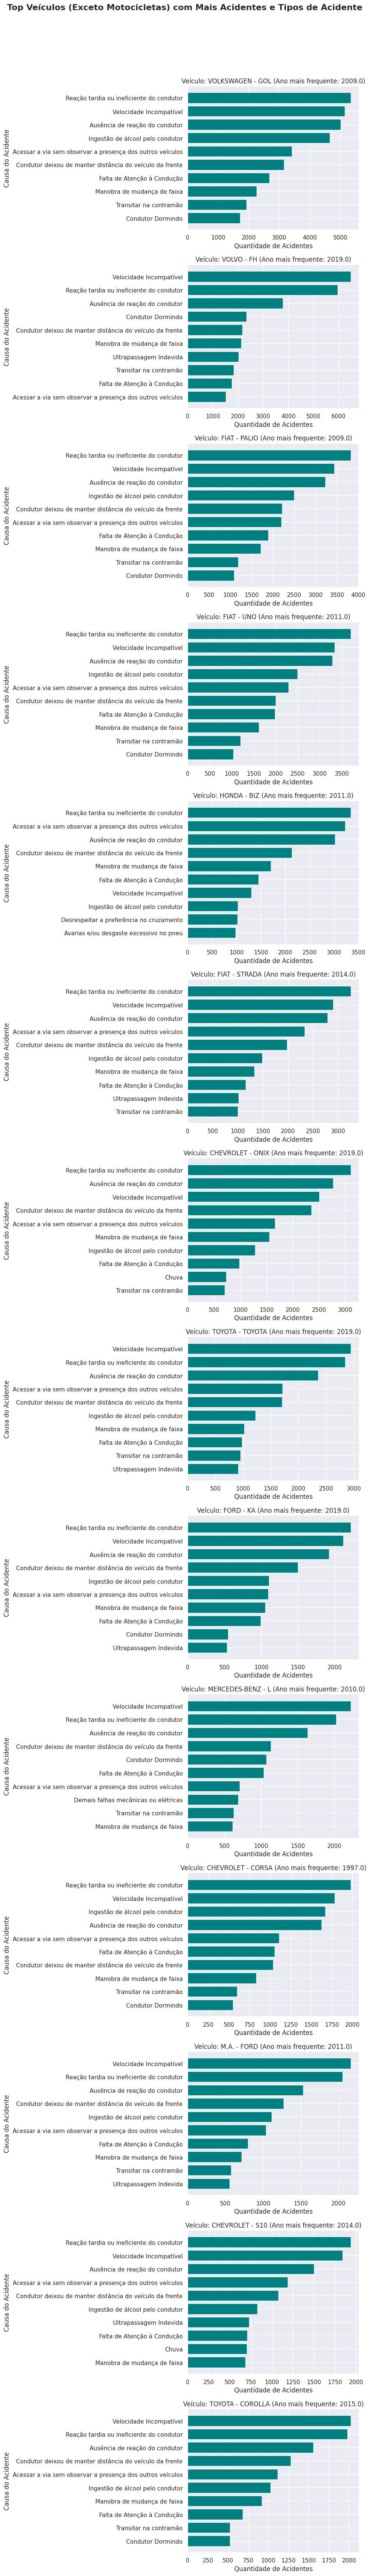

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir o valor inválido do submodelo a ser filtrado
valor_excluir = 'NO'
tipo_excluir = 'Motocicleta' # Novo valor a ser excluído

# --- 1. FILTRO INICIAL: Remover 'NO' da Marca_Subarvore ---
df_filtrado_subarvore = df[~df['Marca_Subarvore'].eq(valor_excluir)].copy() 

# --- 2. NOVO FILTRO: Remover 'Motocicleta' do tipo_veiculo ---
df_limpo = df_filtrado_subarvore[~df_filtrado_subarvore['tipo_veiculo'].eq(tipo_excluir)].copy()


# --- Mapeamento Marca_Subarvore -> Marca_Arvore ---
try:
    # Cria o mapeamento.
    marca_map = df_limpo[['Marca_Subarvore', 'Marca_Arvore']].drop_duplicates().set_index('Marca_Subarvore')['Marca_Arvore'].to_dict()
except KeyError:
    print("Erro: O DataFrame não possui as colunas 'Marca_Subarvore' e/ou 'Marca_Arvore'. Não será possível gerar o rótulo combinado.")
    marca_map = {}


# --- ANÁLISE GERAL (Sem Motocicletas): Top 20 veículos e depois pegar do 1º ao 14º ---

# A contagem agora usa TODOS os tipos de veículos, exceto Motocicletas
top_veiculos = (
    df_limpo.groupby('Marca_Subarvore')['causa_acidente']
    .count()
    .reset_index(name='qtd_acidentes')
    .sort_values('qtd_acidentes', ascending=False)
    .head(20)
)
# Selecionar os 14 primeiros (índices 0 a 13)
top_veiculos = top_veiculos.iloc[0:14] 

n_veiculos = len(top_veiculos)

# Verificação de segurança
if n_veiculos == 0:
    print("A filtragem (excluindo 'NO' e 'Motocicleta') não resultou em veículos válidos para plotar.")
elif n_veiculos > 0:
    fig, axes = plt.subplots(n_veiculos, 1, figsize=(10, 5*n_veiculos), sharex=False)
    # Título ajustado para refletir a nova exclusão
    fig.suptitle("Top Veículos (Exceto Motocicletas) com Mais Acidentes e Tipos de Acidente", fontsize=16, fontweight='bold')

    if n_veiculos == 1:
        axes = [axes]

    for ax, veiculo in zip(axes, top_veiculos['Marca_Subarvore']):
        
        # Filtrar apenas os acidentes do veículo atual
        df_veiculo = df_limpo[df_limpo['Marca_Subarvore'] == veiculo].copy()
        
        # Top 10 tipos de acidentes
        top_causas = (
            df_veiculo.groupby('causa_acidente')
            .size()
            .reset_index(name='qtd_acidentes')
            .sort_values('qtd_acidentes', ascending=False)
            .head(10)
        )
        
        # Encontrar o ano de fabricação mais frequente para este veículo
        if not df_veiculo.empty and 'ano_fabricacao_veiculo' in df_veiculo.columns:
             # Usa .mode().iloc[0] para pegar o valor mais frequente (primeiro se houver empate)
             ano_mais_frequente = df_veiculo['ano_fabricacao_veiculo'].mode().iloc[0]
        else:
             ano_mais_frequente = "N/A"

        # --- AJUSTE: Criar o Rótulo Combinado para o Título ---
        marca_principal = marca_map.get(veiculo, 'Desconhecida')
        titulo_combinado = f"{marca_principal} - {veiculo}"

        # Plot
        ax.barh(top_causas['causa_acidente'], top_causas['qtd_acidentes'], color='teal')
        
        # Usar o rótulo combinado no título
        ax.set_title(f"Veículo: {titulo_combinado} (Ano mais frequente: {ano_mais_frequente})")
        
        ax.set_xlabel("Quantidade de Acidentes")
        ax.set_ylabel("Causa do Acidente")
        ax.invert_yaxis()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

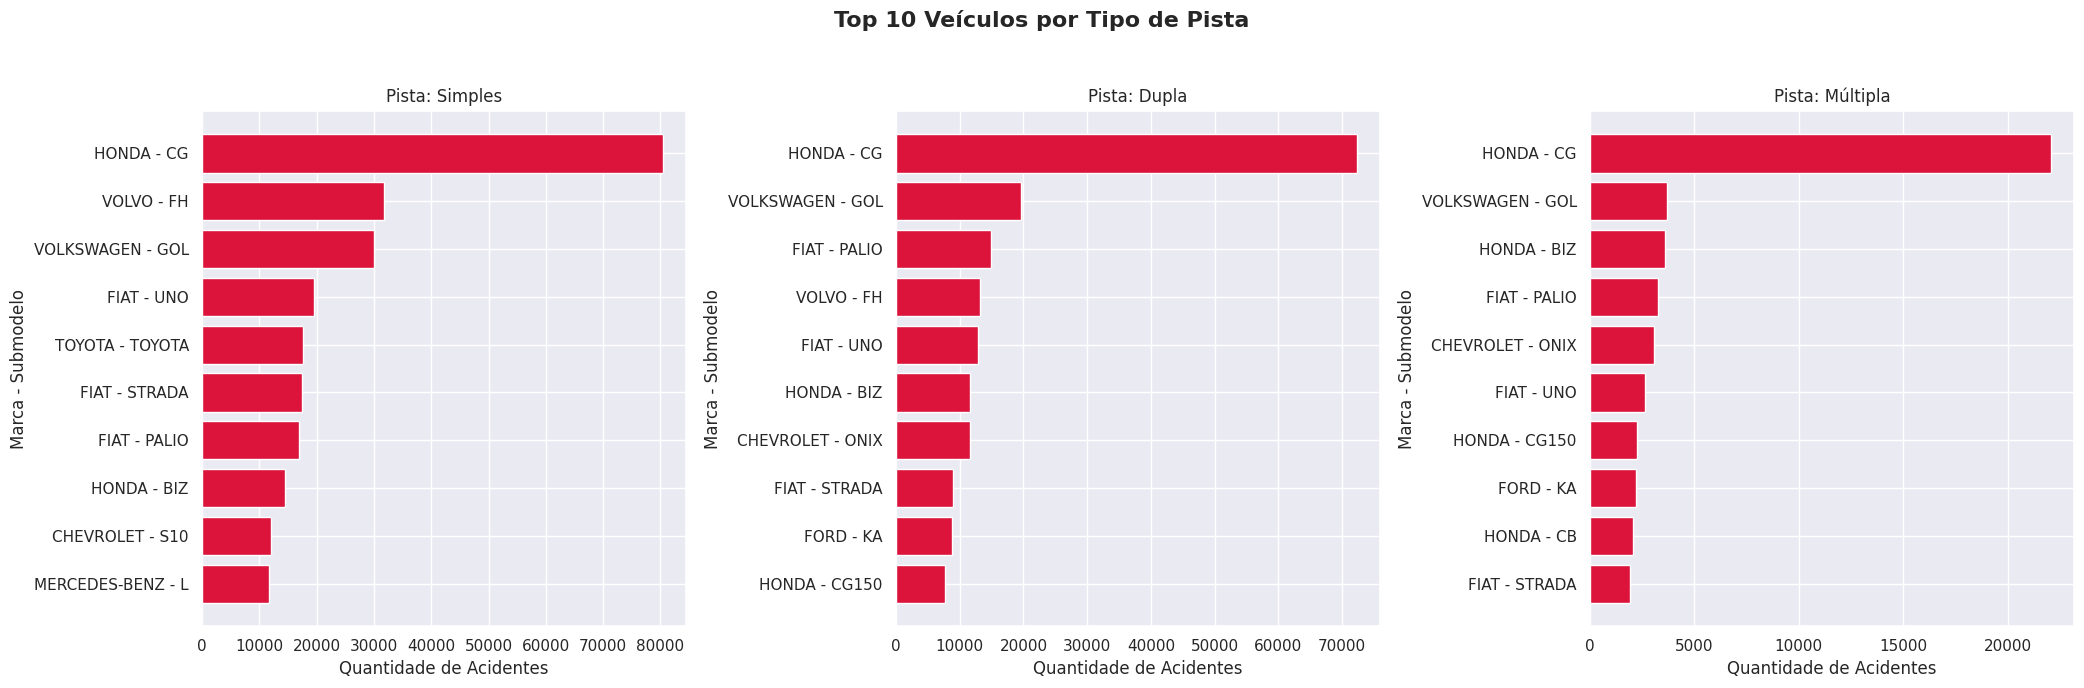

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Limpar marcas inválidas
valor_excluir = 'NO'

# Cria o novo DataFrame 'df_filtrado' removendo as linhas onde 'Marca_Principal' é igual ao valor_excluir
# Usamos o operador de negação (~)
df_limpo = df[~df['Marca_Subarvore'].eq(valor_excluir)].copy()

# Padronizar tipo_pista
df_limpo['tipo_pista'] = df_limpo['tipo_pista'].astype(str).str.strip().str.lower()


# --- NOVO PASSO 1: Criar o mapeamento Marca_Subarvore -> Marca_Arvore ---
try:
    # Cria o mapeamento. Usamos .drop_duplicates() para garantir que
    # o índice (Marca_Subarvore) seja único.
    marca_map = df_limpo[['Marca_Subarvore', 'Marca_Arvore']].drop_duplicates().set_index('Marca_Subarvore')['Marca_Arvore'].to_dict()
except KeyError:
    print("Erro: O DataFrame não possui as colunas 'Marca_Subarvore' e/ou 'Marca_Arvore'. Não será possível gerar o rótulo combinado.")
    marca_map = {}
# -----------------------------------------------------------------------


# Identificar todos os tipos de pista presentes no dataset
tipos_pista = df_limpo['tipo_pista'].unique()
# Remove qualquer valor 'nan' ou vazio que possa ter surgido na padronização
tipos_pista = [pista for pista in tipos_pista if pd.notna(pista) and pista != '']

if not tipos_pista:
    print("Nenhum tipo de pista válido encontrado para plotagem.")
else:
    # Criar subplots
    fig, axes = plt.subplots(1, len(tipos_pista), figsize=(7*len(tipos_pista), 7), sharey=False)
    fig.suptitle("Top 10 Veículos por Tipo de Pista", fontsize=16, fontweight='bold')

    # Garantir que axes seja lista
    if len(tipos_pista) == 1:
        axes = [axes]

    for ax, pista in zip(axes, tipos_pista):
        # Filtrar acidentes dessa pista
        df_pista = df_limpo[df_limpo['tipo_pista'] == pista]
        
        # Top 10 veículos/marcas nessa pista
        top_veiculos = (
            df_pista.groupby('Marca_Subarvore')
            .size()
            .reset_index(name='qtd_acidentes')
            .sort_values('qtd_acidentes', ascending=False)
            .head(10)
        )
        
        # --- NOVO PASSO 2: Aplicar o rótulo combinado ao top_veiculos ---
        if not top_veiculos.empty:
            top_veiculos['Marca_Modelo_Label'] = top_veiculos['Marca_Subarvore'].apply(
                lambda subarvore: f"{marca_map.get(subarvore, 'Desconhecida')} - {subarvore}"
            )
            
            # --- NOVO PASSO 3: Plotar usando o novo rótulo ---
            ax.barh(top_veiculos['Marca_Modelo_Label'], top_veiculos['qtd_acidentes'], color='crimson')
            
            ax.set_ylabel("Marca - Submodelo") # Rótulo do eixo Y atualizado
            ax.invert_yaxis()  # maior no topo
            
        else:
            # Caso não haja dados para esta pista
            ax.text(0.5, 0.5, "Sem dados para esta pista.", transform=ax.transAxes, ha='center')
        
        ax.set_title(f"Pista: {pista.capitalize()}")
        ax.set_xlabel("Quantidade de Acidentes")


    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

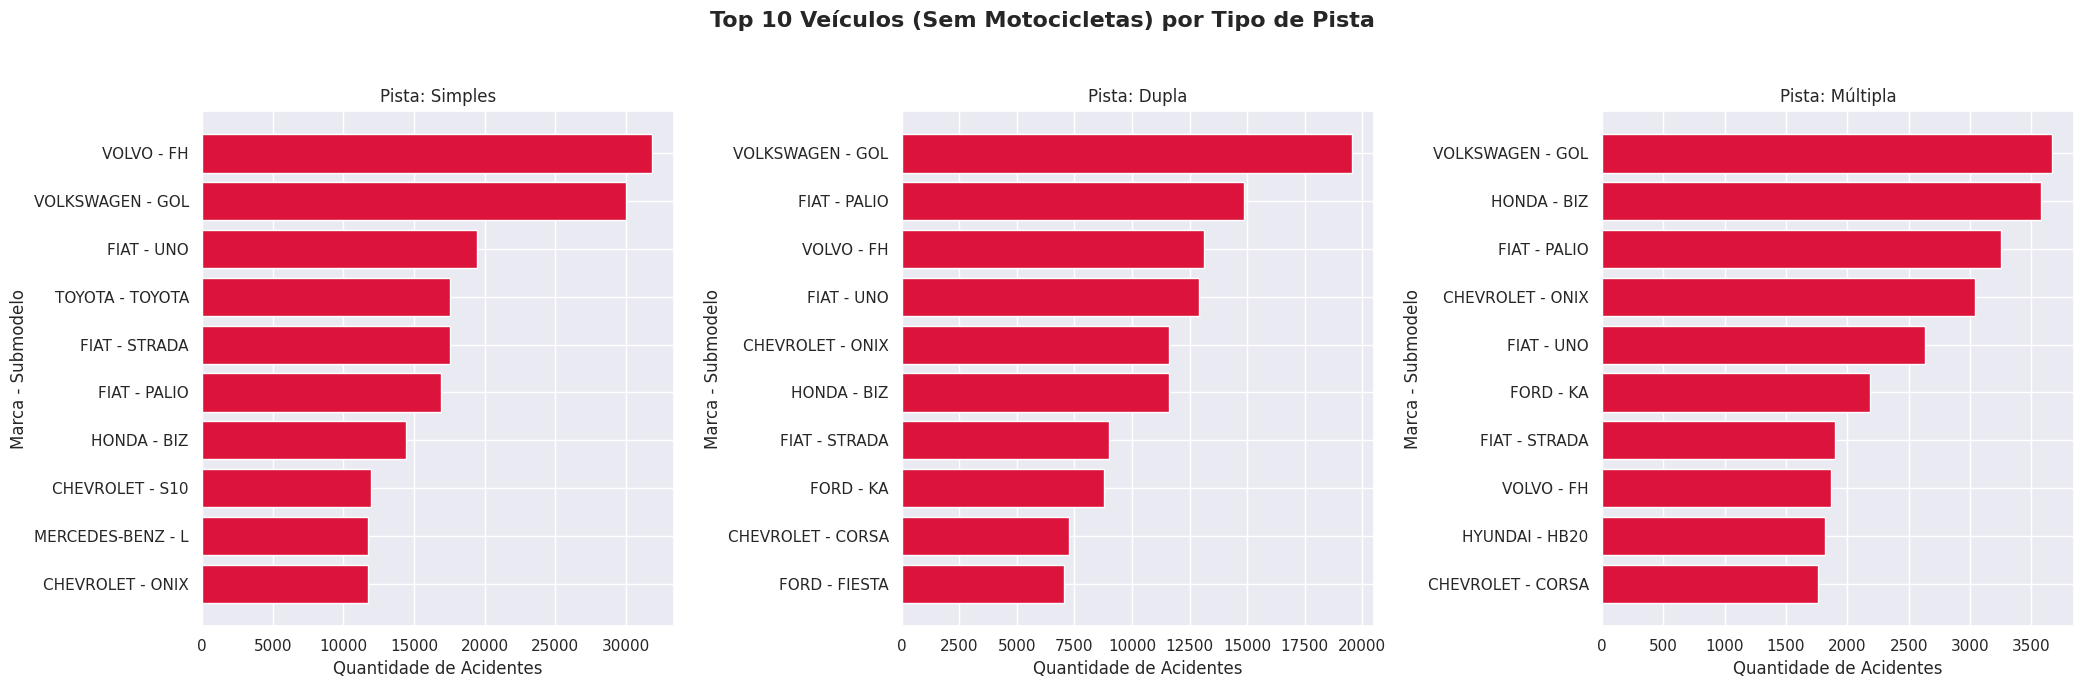

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir os valores a serem excluídos
valor_excluir_subarvore = 'NO'
tipo_excluir = 'Motocicleta' # Filtro adicional

# 1. Filtro 1: Remove 'NO' da Marca_Subarvore
df_filtrado_no = df[~df['Marca_Subarvore'].eq(valor_excluir_subarvore)].copy()

# 2. Filtro 2: Remove 'Motocicleta' do tipo_veiculo
df_limpo = df_filtrado_no[~df_filtrado_no['tipo_veiculo'].eq(tipo_excluir)].copy()

# Padronizar tipo_pista
df_limpo['tipo_pista'] = df_limpo['tipo_pista'].astype(str).str.strip().str.lower()


# --- NOVO PASSO 1: Criar o mapeamento Marca_Subarvore -> Marca_Arvore ---
try:
    # Cria o mapeamento. Usa o df_limpo (filtrado por 'NO' e 'Motocicleta')
    marca_map = df_limpo[['Marca_Subarvore', 'Marca_Arvore']].drop_duplicates().set_index('Marca_Subarvore')['Marca_Arvore'].to_dict()
except KeyError:
    print("Erro: O DataFrame não possui as colunas 'Marca_Subarvore' e/ou 'Marca_Arvore'. Não será possível gerar o rótulo combinado.")
    marca_map = {}
# -----------------------------------------------------------------------


# Identificar todos os tipos de pista presentes no dataset
tipos_pista = df_limpo['tipo_pista'].unique()
# Remove qualquer valor 'nan' ou vazio que possa ter surgido na padronização
tipos_pista = [pista for pista in tipos_pista if pd.notna(pista) and pista != '']

if not tipos_pista:
    print("Nenhum tipo de pista válido encontrado para plotagem após a filtragem.")
else:
    # Criar subplots
    fig, axes = plt.subplots(1, len(tipos_pista), figsize=(7*len(tipos_pista), 7), sharey=False)
    fig.suptitle("Top 10 Veículos (Sem Motocicletas) por Tipo de Pista", fontsize=16, fontweight='bold')

    # Garantir que axes seja lista
    if len(tipos_pista) == 1:
        axes = [axes]

    for ax, pista in zip(axes, tipos_pista):
        # Filtrar acidentes dessa pista
        df_pista = df_limpo[df_limpo['tipo_pista'] == pista]
        
        # Top 10 veículos/marcas nessa pista
        top_veiculos = (
            df_pista.groupby('Marca_Subarvore')
            .size()
            .reset_index(name='qtd_acidentes')
            .sort_values('qtd_acidentes', ascending=False)
            .head(10)
        )
        
        # --- NOVO PASSO 2: Aplicar o rótulo combinado ao top_veiculos ---
        if not top_veiculos.empty:
            top_veiculos['Marca_Modelo_Label'] = top_veiculos['Marca_Subarvore'].apply(
                lambda subarvore: f"{marca_map.get(subarvore, 'Desconhecida')} - {subarvore}"
            )
            
            # --- NOVO PASSO 3: Plotar usando o novo rótulo ---
            ax.barh(top_veiculos['Marca_Modelo_Label'], top_veiculos['qtd_acidentes'], color='crimson')
            
            ax.set_ylabel("Marca - Submodelo") # Rótulo do eixo Y atualizado
            ax.invert_yaxis()  # maior no topo
            
        else:
            # Caso não haja dados para esta pista
            ax.text(0.5, 0.5, "Sem dados para esta pista.", transform=ax.transAxes, ha='center')
        
        ax.set_title(f"Pista: {pista.capitalize()}")
        ax.set_xlabel("Quantidade de Acidentes")


    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [ ]:
# Contar todas as ocorrências na coluna 'Marca_Subarvore'
contagem_todos = df['Marca_Subarvore'].value_counts()

# Isolamos a contagem para 'NO'
# Usamos .get() para evitar um erro caso 'NO' não exista na coluna
contagem_no = contagem_todos.get('NO', 0)

print(f"O número de ocorrências de 'NO' na coluna 'Marca_Subarvore' é: {contagem_no}")

O número de ocorrências de 'NO' na coluna 'Marca_Subarvore' é: 102008


/tmp/ipykernel_17495/776987249.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_17495/776987249.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


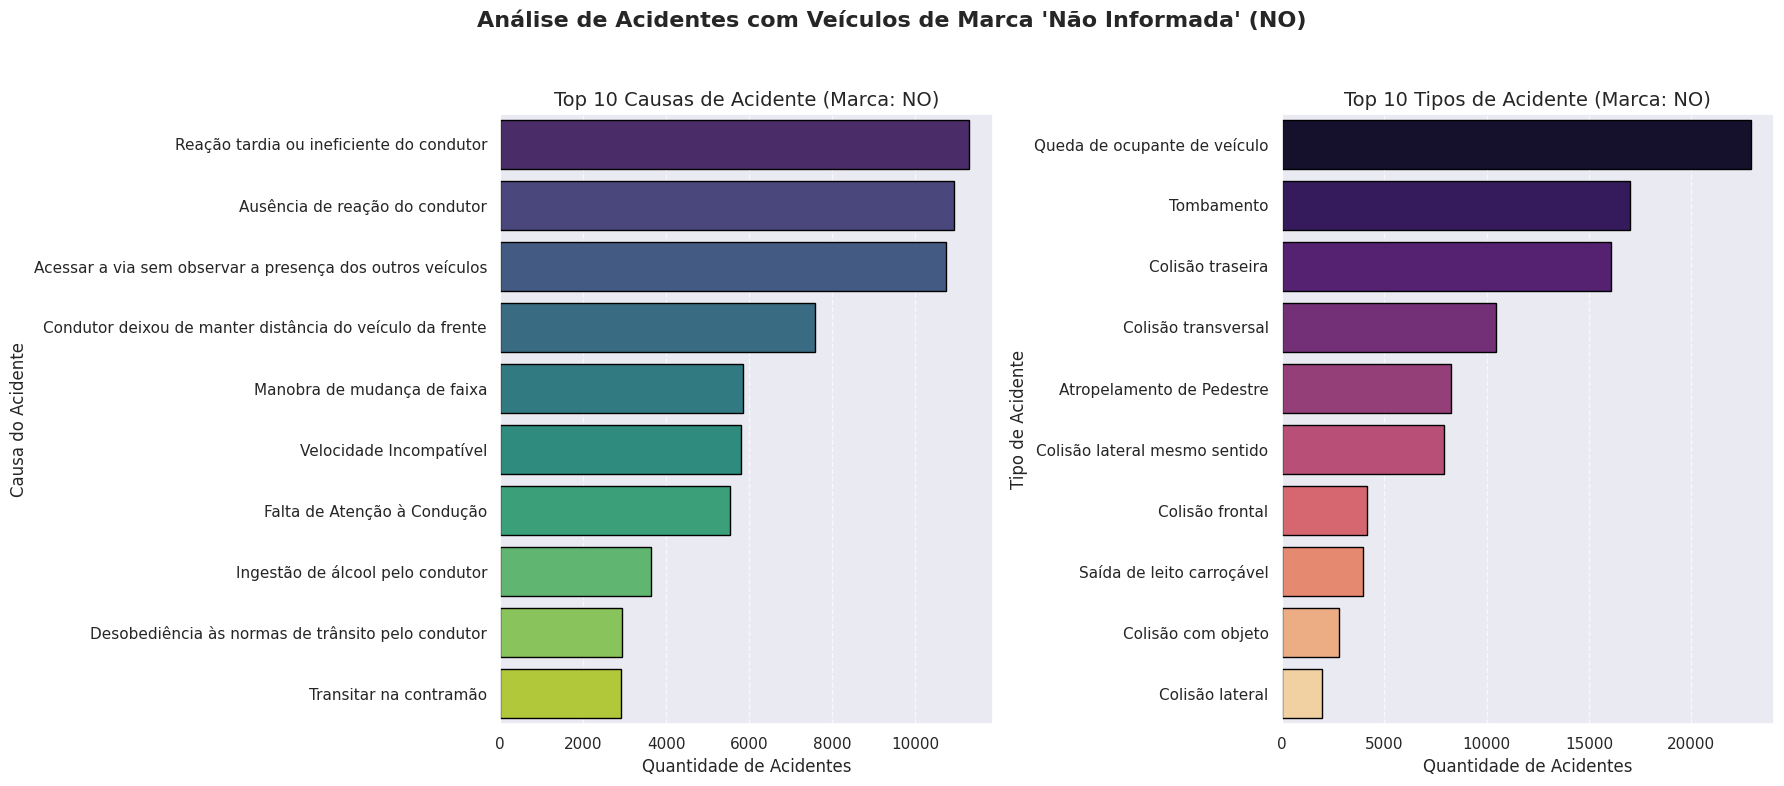

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Filtra o DataFrame para incluir APENAS os registros onde Marca_Subarvore é 'NO'
# Adiciona padronização (toUpperCase) para capturar 'no', 'No', etc., se existirem.
df_no = df[df['Marca_Subarvore'].astype(str).str.upper() == 'NO'].copy()

# 2. Verifica se há dados suficientes para plotar
if df_no.empty:
    print("O DataFrame filtrado para 'Marca_Subarvore' = 'NO' está vazio. Não é possível gerar os gráficos.")
else:
    # --- GRÁFICO 1: Top 10 Causa_Acidente para 'NO' ---
    top_causas_no = (
        df_no.groupby('causa_acidente')
        .size()
        .reset_index(name='qtd_acidentes')
        .sort_values('qtd_acidentes', ascending=False)
        .head(10)
    )

    # --- GRÁFICO 2: Top 10 Tipo_Acidente para 'NO' ---
    top_tipos_no = (
        df_no.groupby('tipo_acidente')
        .size()
        .reset_index(name='qtd_acidentes')
        .sort_values('qtd_acidentes', ascending=False)
        .head(10)
    )
    
    # 3. Cria a Figura e os Subplots (2 colunas)
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle("Análise de Acidentes com Veículos de Marca 'Não Informada' (NO)", fontsize=16, fontweight='bold')

    # --- Plotagem do Gráfico 1: Causa do Acidente ---
    if not top_causas_no.empty:
        sns.barplot(
            data=top_causas_no,
            x='qtd_acidentes',
            y='causa_acidente',
            ax=axes[0],
            palette='viridis',
            edgecolor='black'
        )
        axes[0].set_title("Top 10 Causas de Acidente (Marca: NO)", fontsize=14)
        axes[0].set_xlabel("Quantidade de Acidentes", fontsize=12)
        axes[0].set_ylabel("Causa do Acidente", fontsize=12)
        axes[0].grid(axis='x', linestyle='--', alpha=0.7)
    else:
        axes[0].text(0.5, 0.5, "Sem dados de Causa de Acidente para 'NO'.", transform=axes[0].transAxes, ha='center')


    # --- Plotagem do Gráfico 2: Tipo de Acidente ---
    if not top_tipos_no.empty:
        sns.barplot(
            data=top_tipos_no,
            x='qtd_acidentes',
            y='tipo_acidente',
            ax=axes[1],
            palette='magma',
            edgecolor='black'
        )
        axes[1].set_title("Top 10 Tipos de Acidente (Marca: NO)", fontsize=14)
        axes[1].set_xlabel("Quantidade de Acidentes", fontsize=12)
        axes[1].set_ylabel("Tipo de Acidente", fontsize=12)
        axes[1].grid(axis='x', linestyle='--', alpha=0.7)
    else:
        axes[1].text(0.5, 0.5, "Sem dados de Tipo de Acidente para 'NO'.", transform=axes[1].transAxes, ha='center')

    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta o layout para evitar sobreposição do título
    plt.show()